# INTRODUCTION
Through this project, we aim to offer a comprehensive understanding of Sabeco's stock price characteristics and conduct stock price predictions. Predicting stock prices is vital for both investors and financial analysts, as it enables informed decision-making. Sabeco is a prominent player in Vietnam's alcoholic beverage market, and it holds significant influence due to its substantial market capitalization and operational scale. However, its stock price is subject to volatility driven by various internal and external factors.

The main objective of this project is to analyze historical data, employ technical indicators, and develop a robust predictive model using both traditional econometric methods and deep learning techniques. By accurately forecasting Sabeco's future stock prices, this model will provide valuable insights for investors seeking optimal choices and for Sabeco in formulating effective business strategies.

**1. Statistical Analysis**

 > We start by conducting a descriptive analysis of the dataset, summarizing key statistical measures to capture central tendencies and patterns in Sabeco's historical stock data. Data visualization will be employed to enhance our understanding of the dataset, providing insights into the temporal evolution of Sabeco's stock prices.

**2. Stock Prediction with Econometric Methods**

 > In this section, we explore two primary econometric methods: Exponential Smoothing and ARIMA. These methods aim to leverage historical data to model and forecast Sabeco's stock prices, offering insights into potential future trends based on established statistical techniques.

**3. Stock Prediction with Deep Learning Methods**

 > Moving beyond traditional methods, we delve into the realm of deep learning with a focus on Long Short-Term Memory (LSTM) networks and Gated Recurrent Unit (GRU) models. These AI-driven approaches offer sophisticated ways to capture nonlinear relationships and temporal dependencies in Sabeco's stock prices.

**4. Comparison of Methods**

 > In this section, we compare the performance of econometric methods (Exponential Smoothing, ARIMA) and deep learning methods (LSTM, GRU) in forecasting Sabeco's stock prices. Through rigorous assessment methods, we compare the efficacy of traditional econometric models with advanced deep learning techniques in forecasting Sabeco's stock prices, offering perspectives on the evolving landscape of predictive analytics in financial markets.



# Import libraries

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.8 MB/s eta 0:00:00


In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [ ]:
# basic libraries
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings("ignore")

# for data collecting and preprocessing
import yfinance as yf

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

# for econometric models
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima import auto_arima
from math import floor,ceil,sqrt

# for deep learning models
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU

# Collect and Clean data

*Data source: yahoo finance*

This dataset encompasses the stock information of Sabeco (Saigon Beer Alcohol Beverage Corporation) between 2016 and 2024 within the 'Beverage' industry. Established in 1875, Sabeco is headquartered in Ho Chi Minh City, Vietnam, and is recognized as a key player in Vietnam's alcoholic beverage market (about 33.9% market share in 2021). The company, renowned for its various beer brands such as Saigon Beer, 333, and Lac Viet, has diversified its operations into multiple sectors, including investments in stocks, bonds, and real estate.

The dataset includes the following columns:
- **Open and Close**: Represent the opening and closing prices of Sabeco's stock for the trading day.
- **High and Low**: Indicate the highest and lowest prices reached by the stock during the trading session.
- **Volume**: Denotes the total number of shares traded on a given day.
- **Adjusted Close**: Reflects the final price adjusted for any stock splits or dividends.
- **Index (Date)**: Represents the trading date

Upon thorough examination, the original dataset does not contain any missing values; thus, we do not need to conduct further data cleaning.

In [ ]:
data = yf.download("SAB.VN",start='2016-01-01',end='2024-06-07')
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-12-06,66000.0,66000.0,66000.0,66000.0,64440.945312,6020
2016-12-07,70600.0,70600.0,70600.0,70600.0,68932.281250,570660
2016-12-08,75500.0,75500.0,75500.0,75500.0,73716.539062,2000
2016-12-09,75500.0,80750.0,75500.0,80750.0,78842.523438,5778820
2016-12-12,86400.0,86400.0,86400.0,86400.0,84359.054688,71380
...,...,...,...,...,...,...
2024-05-31,59300.0,59300.0,58300.0,58300.0,58300.000000,1563200
2024-06-03,59000.0,60100.0,58700.0,59400.0,59400.000000,1148600
2024-06-04,59700.0,61700.0,59500.0,61400.0,61400.000000,2409000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1868 entries, 2016-12-06 to 2024-06-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1868 non-null   float64
 1   High       1868 non-null   float64
 2   Low        1868 non-null   float64
 3   Close      1868 non-null   float64
 4   Adj Close  1868 non-null   float64
 5   Volume     1868 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 102.2 KB


In [ ]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Question 1 - Statistical Analysis

## 1.1. Overview

In [ ]:
# create the return column
data['Returns'] = data['Close'].pct_change()

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Returns
count,1868.000000,1868.000000,1868.000000,1868.000000,1868.000000,1.868000e+03,1867.000000
mean,97578.238758,98701.766595,96319.619914,97516.836188,95287.401024,4.202473e+05,0.000167
std,22811.409028,23058.271461,22426.069558,22824.198096,22158.858772,1.319573e+06,0.018543
min,53300.000000,53600.000000,52000.000000,52500.000000,52500.000000,2.000000e+03,-0.069907
25%,79950.000000,80750.000000,78987.500000,79950.000000,78061.421875,1.327900e+05,-0.008509
50%,94000.000000,95000.000000,92675.000000,93900.000000,91681.890625,2.802900e+05,0.000000
75%,115787.500000,117212.500000,114000.000000,116000.000000,113259.843750,5.013000e+05,0.007540
max,170900.000000,173500.000000,165000.000000,169500.000000,165496.062500,5.347434e+07,0.069969


**COMMENT**

In terms of the opening prices, Sabeco's stock shows a range from a low of 53,300 VND to a high of 170,900 VND, with a mean of 97,595.15 VND and a median of 94,000 VND. The gap between mean and median is not big with a bigger mean than median refer to a positive skewness in distribution.

Similarly, the high and low prices further illustrate the stock's volatility. The high prices range from 53,600 VND to 173,500 VND, with a mean of 98,719.28 VND and a median of 95,000 VND. On the other hand, the low prices span from 52,000 VND to 165,000 VND, with a mean of 96,335.86 VND and a median of 92,700 VND.

Analyzing the closing prices, which represent the final trading activity of each session, Sabeco's stock recorded a range from 52,500 VND to 169,500 VND, with a mean closing price of 97,533.72 VND and a median of 93,900 VND. Also, the average return of approximately 0.02% suggests relatively modest average daily price changes in percentage terms.

## 1.2. Close Price

### 1.2.1. Price Distribution

In [ ]:
# create a function to plot price over time
def overall_plot(data,metric):
  plt.figure(figsize=(15,5))
  plt.plot(data[metric])
  plt.xlabel('YEAR')
  plt.ylabel(f'{metric} PRICE'.upper())
  plt.title(f'{metric} PRICE of Sabeco over the years'.upper())
  plt.grid(True)

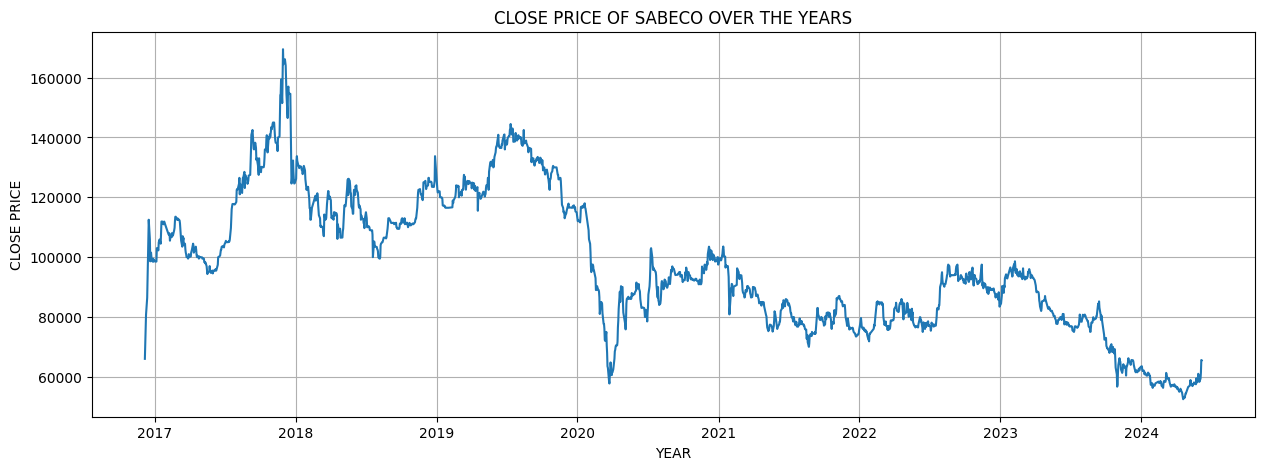

In [ ]:
overall_plot(data,'Close')

**COMMENT**

From 2017 to 2023, Sabeco's stock experienced several notable fluctuations. The peak occurred in 2018, marking the highest point for the stock during this period. However, starting in 2020, Sabeco's stock began a significant downward trend. This decline could be attributed to various factors such as the impact of the COVID-19 pandemic, shifts in consumer markets, and broader macroeconomic influences. Overall, besides periods of significant growth, the post-2020 downward trend highlights the challenges Sabeco faces in maintaining its stock value.

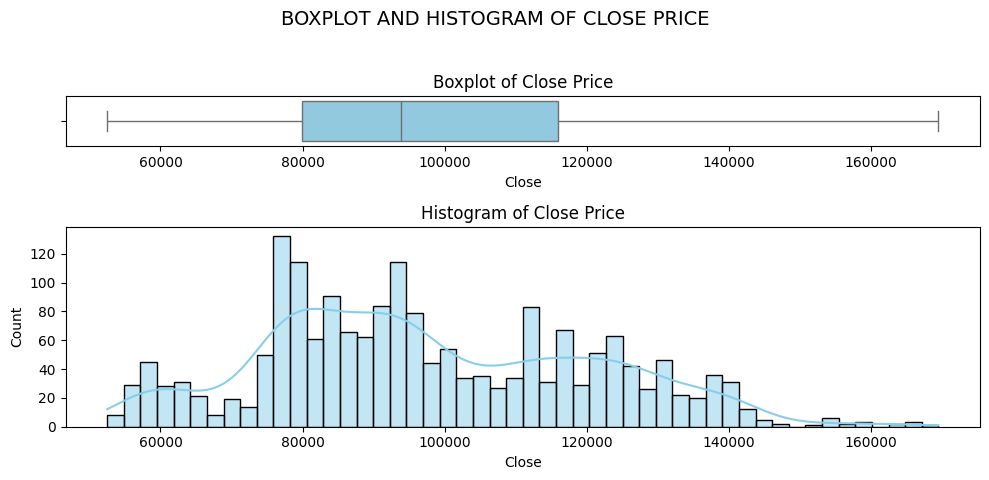

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 5), gridspec_kw={'height_ratios': [1, 4]})

# Boxplot (Top subplot)
sns.boxplot(x=data['Close'], ax=axes[0], color='skyblue')
axes[0].set_title('Boxplot of Close Price')

# Histogram (Bottom subplot)
sns.histplot(data['Close'], bins=50, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Histogram of Close Price')

# Set the main title for the figure
plt.suptitle('Boxplot and Histogram of Close Price'.upper(), fontsize=14)

# Adjust layout to prevent overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

**COMMENT**

Sabeco's close prices exhibit a significant level of concentration between 80,000 VND and 100,000 VND, indicating a common trading range for this stock.

Over three-quarters of the time, SAB stock prices show a consistent pricing pattern. The right-skewed distribution  of close prices suggests a tendency towards higher opening prices, particularly in recent quarters.

SAB stock prices remains median approximately 95000 VND. The presence of few outliers in the boxplot indicates that the stock's opening prices are relatively stable and exhibit low volatility, further reinforcing the stock's steady performance.

### 1.2.2. Price during the COVID-19 period

In [ ]:
def bollinger(data, start, end):
    plt.figure(figsize=(15, 5))

    # Extract the specific bank data
    bank_data = data['Close'].loc[start:end]

    # Create data for the basis line (20-day moving average), upper band, and lower band
    basis = bank_data.rolling(window=20).mean()
    dev = 2 * bank_data.rolling(window=20).std()
    upper = basis + dev
    lower = basis - dev

    # Plot
    plt.plot(bank_data, label='Close Price')
    plt.plot(basis, label='Moving Average (20-day)')
    plt.plot(upper, label='Upper Band')
    plt.plot(lower, label='Lower Band')

    # Format x-axis to show months
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.title(f'SABECO\'s Close Price DURING COVID-19 (from {start} to {end})'.upper())
    plt.legend()

    plt.tight_layout()
    plt.grid()
    plt.show()

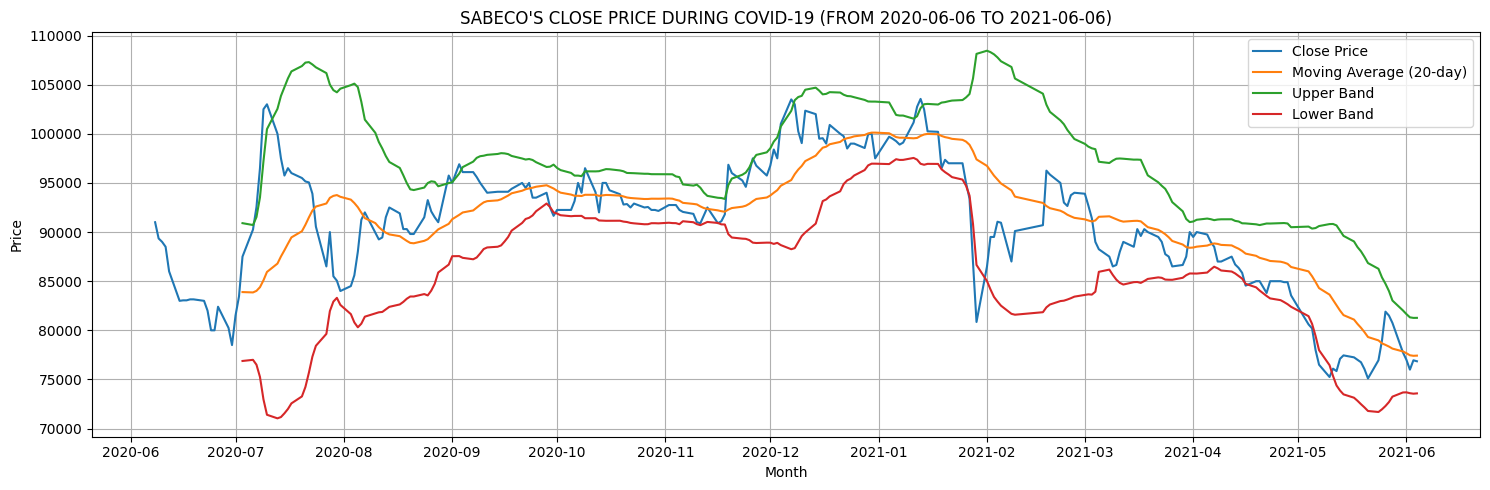

In [ ]:
bollinger(data, '2020-06-06', '2021-06-06')

**COMMENT**

The distance between the upper and lower Bollinger Bands for Sabeco's stock price was approximately 15000 VND in this period. The COVID-19 outbreak has significantly impacted the stock prices of Beverage-Tobacco Industry, leading to a noticeable downward trend of SAB after the year 2020. Despite these challenges, the stock price still traded closer to the upper Bollinger Band (UBB), which may indicate potential bullish sentiment among investors.

In the context of a challenging economic environment, the beer market has shifted focus from the near-premium segment to the more popular segment. Sabeco, with its strong presence in the near-premium segment and a diverse product lineup including Lager, 333, Lac Viet, and Export, has managed to record a smaller decline in sales compared to Heineken. This resilience highlights Sabeco's strategic advantage and adaptability in maintaining market share during economic downturns (Topi.vn, 2024).

### 1.2.3. Price in 2024

In [ ]:
def candle(data, start, end):
    plt.figure(figsize=(15, 5))

    # Extract the specific bank data
    bank_data = data.loc[start:end]

    # Reset index to make 'Date' a column
    bank_data.reset_index(inplace=True)

    # Convert 'Date' to matplotlib date format
    bank_data['Date'] = bank_data['Date'].apply(lambda x: mdates.date2num(x))

    # Create an array of tuples in the required format
    ohlc = bank_data[['Date', 'Open', 'High', 'Low', 'Close']].values

    # Create a subplot
    ax = plt.subplot(1, 1, 1)

    # Plot candlestick chart
    candlestick_ohlc(ax, ohlc, width=0.5, colorup='green', colordown='red')
    ax.xaxis_date()

    # Set labels and title
    plt.xlabel('Month')
    plt.ylabel('Price')
    plt.title(f'SABECO\'S Close Price in 2024'.upper())
    plt.grid(True)
    plt.xticks(fontsize=10)

    plt.tight_layout()
    plt.show()

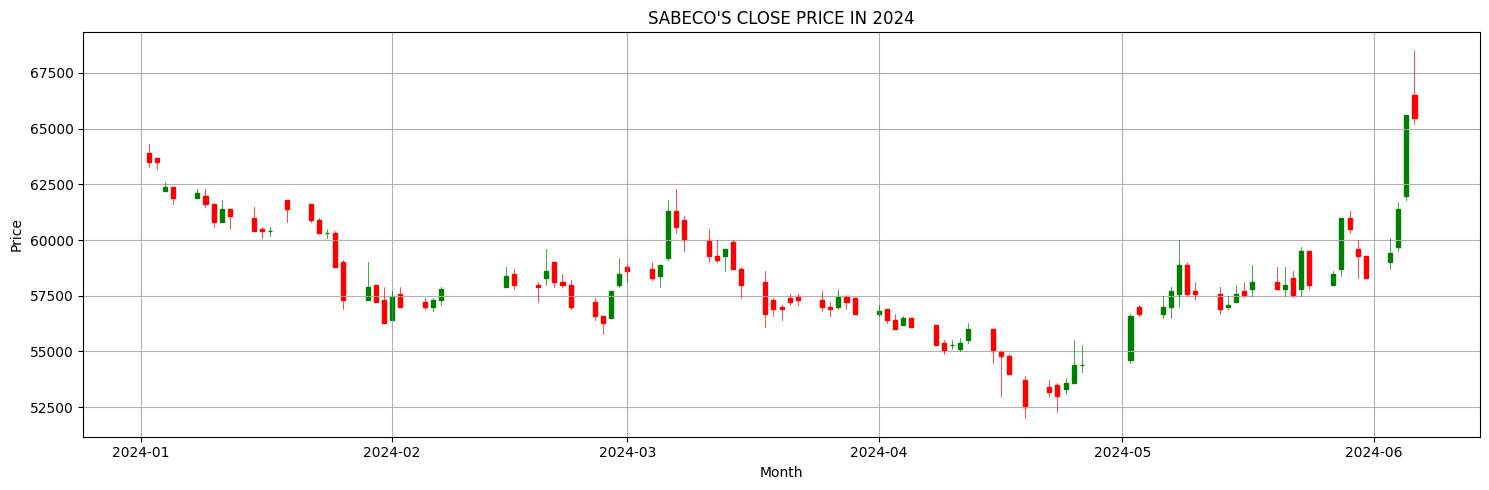

In [ ]:
candle(data, '2024-01-01', '2024-06-07')

**COMMENT**

The green candles mean open price is lower than the close price at the end of the trading day, conversely the red candles mean open price is higher than the close price. The top of each candlestick wick corresponds to the highest price (High) and the bottom to the lowest price (Low) during a trading session.

Overall, closing price for Sabeco's stock was lower than the opening price for most of the time. This suggests a downtrend in the short-term. The difference between the opening and closing prices of SAB in the first two quarters of 2024 is not significant. There are doji candles interspersed with regular bearish candles at most times. From March to April 2024, there are hammer candles indicating a reversal in the price difference between the closing and opening prices in the following months.


## 1.3. Returns

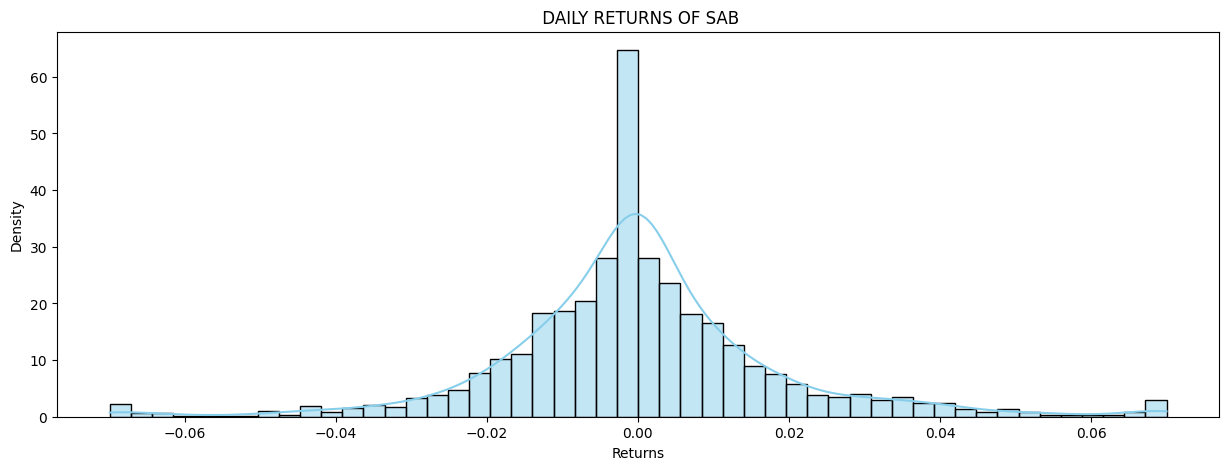

In [ ]:
# create histplot for returns
plt.figure(figsize=(15, 5))
sns.histplot(data['Returns'], kde=True, stat="density", bins=50, color='skyblue', edgecolor='black')
plt.title(' Daily Returns of SAB'.upper())
plt.xlabel('Returns')
plt.ylabel('Density')
plt.show()

**COMMENT**

The bell-shaped curve suggests a normal distribution in returns, where most returns are clustered around the average return with fewer returns falling towards the extremes. This distribution is typical for many financial returns, as extreme changes in stock prices are less common.

The spread is from -2% to 2% which indicates a low volatility in SAB stock. Since the returns mostly lie within the -2% to 2% range, this suggests that large price swings are uncommon. For investors, this lower volatility can be interpreted as lower risk because the stock price is less likely to experience large, unexpected changes.

## 1.4. Annual Volume

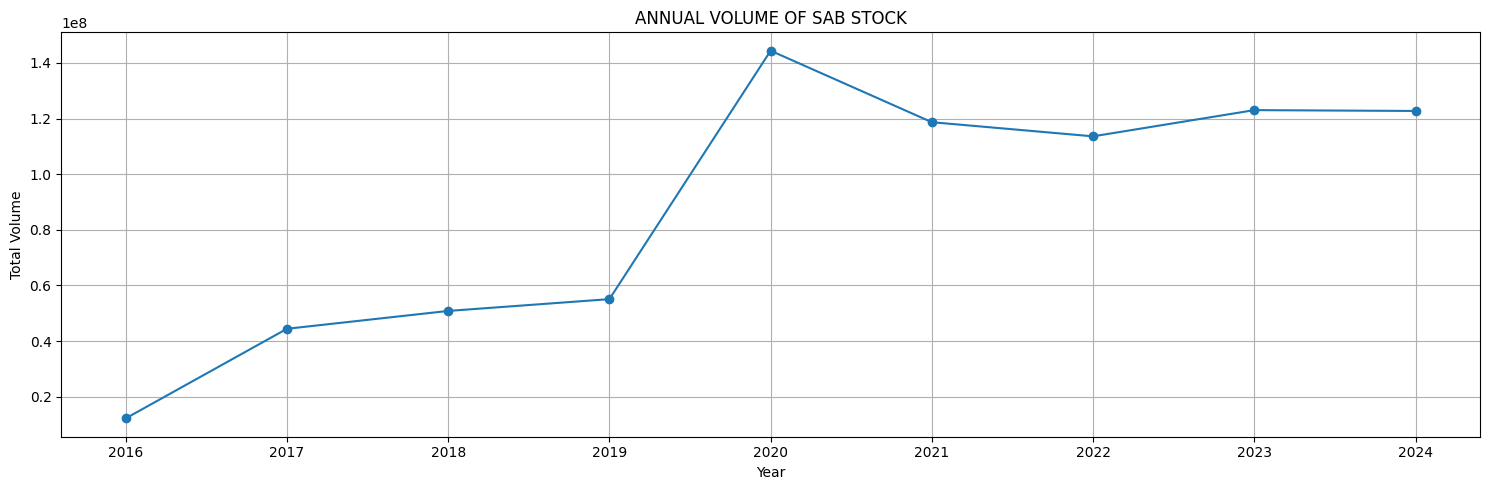

In [ ]:
annual_volume = data.resample('Y').sum()
plt.figure(figsize=(15, 5))
plt.plot(annual_volume.index.year, annual_volume['Volume'], marker='o', linestyle='-')
plt.title('Annual Volume of SAB Stock'.upper())
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

**COMMENT**

From 2016 to 2019, SAB's trading volume consistently remained below 60,000,000 shares. However, after that period, there was a significant increase in trading volume starting in 2020, where it peaked dramatically. This peak was followed by a small dip in 2021, but the trading volume still remained high, consistently staying above 100,000,000 shares for the rest of the period observed. This trend indicates a substantial rise in investor interest and activity in SAB shares beginning in 2020, despite the slight fluctuation in 2021.

# Question 2 - Stock Prediction with Econometric Methods

This section explores advanced econometric methods for stock prediction, focusing on two key techniques: Exponential Smoothing and Autoregressive Integrated Moving Average (ARIMA).

## 2.1. Exponential Smoothing

Holt-Winters Exponential Smoothing was named after its two contributors: Charles Holt and Peter Winter’s. This method takes into account the weighted averages of prior data, where the weights decrease exponentially as the observations grow older. Single Exponential Smoothing uses a single parameter, alpha, which captures the level of the time series. Double Exponential Smoothing, also known as Holt’s Exponential Smoothing, captures both the level and the trend. In Holt-Winters Exponential Smoothing, seasonality in the data is also captured, in addition to the level and trend. This method introduces a parameter called gamma, along with alpha and beta, to control the influence of the seasonal component. Capturing these three parameters results in higher forecasting accuracy.

In our case, a univariate analysis was conducted using Holt-Winters Exponential Smoothing, applied to the closing price of SABECO. Initially, there were 1868 records in total. 80% of the data (1494 records) was used as the training dataset, and 20% of the data (374 records) was used as the testing dataset. An ExponentialSmoothing() function was imported from the statsmodels package, using an additive trend and an additive seasonal component. The seasonal_periods parameter is set to 12, indicating that the data exhibits seasonality every 12 periods.


In [ ]:
# Split the data into training and testing sets (80-20 split)
data_exp = data['Close']
train_size = int(len(data_exp) * 0.8)

train_exp = data_exp[:train_size]
test_exp = data_exp[train_size:]

In [ ]:
tes_model = ExponentialSmoothing(train_exp,
                                 trend='add',
                                 seasonal='add',
                                 seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
predict_exp = tes_model.forecast(test_exp.shape[0])
predict_exp.index = test_exp.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# calculate mean squared error for model evaluation
test_exp_rmse = math.sqrt(mean_squared_error(np.array(test_exp), np.array(predict_exp)))
test_exp_r2 = r2_score(np.array(test_exp), np.array(predict_exp))
print('RMSE Score: %.1f' % (test_exp_rmse))
print('R2 Score: %.2f' % (test_exp_r2))

RMSE Score: 5956.1
R2 Score: 0.80


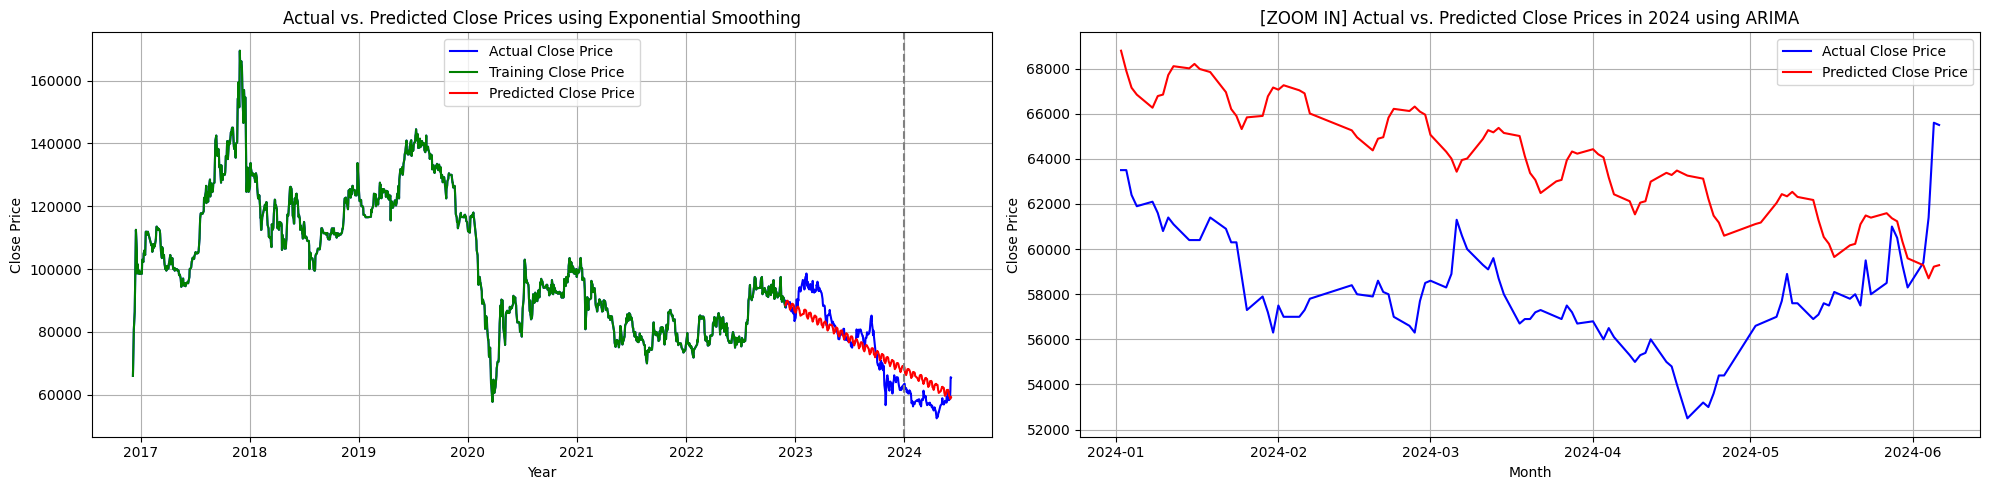

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot baseline and predictions for the entire dataset
axes[0].plot(data_exp, label="Actual Close Price", color='blue')
axes[0].plot(train_exp, label="Training Close Price", color='green')
axes[0].plot(predict_exp,label="Predicted Close Price", color='red')
axes[0].axvline(pd.to_datetime('2024-01-01'), color='gray', linestyle='--')
axes[0].set_title("Actual vs. Predicted Close Prices using Exponential Smoothing")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Close Price")
axes[0].legend()
axes[0].grid(True)

# Plot baseline and predictions for 2024 data only
axes[1].plot(data_exp[data_exp.index >= pd.to_datetime('2024-01-01')], label="Actual Close Price", color='blue')
axes[1].plot(predict_exp[predict_exp.index >= pd.to_datetime('2024-01-01')],label="Predicted Close Price", color='red')
axes[1].set_title("[ZOOM IN] Actual vs. Predicted Close Prices in 2024 using ARIMA")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Close Price")
axes[1].legend()
axes[1].grid(True)

# Adjust layout for the plots
plt.tight_layout()

# Show plot
plt.show()

**COMMENT**

Looking at the full-time chart (left-side chart), we observe a nearly straight line indicating a downward trend in predicted close prices. Meanwhile, on the 2024 chart (right-side chart), the predicted prices fluctuate up and down while still following the overall downward trend. The model's RMSE score of 5956.1 indicates a relatively high level of error in its predictions. The R2 score of 0.80 signifies that the model can explain 80% of the variance in actual prices, indicating moderate predictive capability.

## 2.2. ARIMA

**Autoregressive Integrated Moving Average (ARIMA)** models predict future values based on past values using lagged moving averages to smooth time series data, a technique commonly employed in econometrics. The modeling process begins with initial fitting via linear regression, followed by forecasting with moving averages. Despite their effectiveness in short-term forecasting, ARIMA models have limitations in long-term predictions.

ARIMA models comprise 3 essential components:
- AR (Autoregressive): the forecasted  value depends  on linear  combinations of  own past observed values.
- I (Integrated): This refers to the differencing step applied to make the time series stationary, which involves removing trend and seasonality.
- MA (Moving Average): takes the average of residuals of the past few observations to forecast the present value.

ARIMA models are denoted as ARIMA(p, d, q), where:
- p: Represents the number of lagged observations included in the model (autoregressive order).
- d: Represents the number of times that differencing is applied to the time series data to achieve stationarity (differencing order).
- q: Represents the size of the moving average window, indicating the number of lagged forecast errors used in the model (moving average order).

The values of p, d, and q are determined by examining the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots. The training dataset comprised 80% of the data (1494 records), while the testing dataset comprised the remaining 20% (374 records).



In [ ]:
data_arima = data.copy()

# create training and testing sets (80-20)
shape = data.shape[0]
train = data[:ceil(shape*0.8)]
test = data[ceil(shape*0.8):]

In [ ]:
# model training
auto_arima = auto_arima(train["Close"], start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0,
                   seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
auto_arima.fit(train["Close"])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=17.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=27663.686, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=27356.734, Time=1.48 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=27641.284, Time=0.24 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=27244.756, Time=5.63 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=19.47 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=27193.413, Time=3.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=27335.033, Time=1.21 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=18.82 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.17 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=27243.228, Time=5.27 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=30.51 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True)

In [ ]:
# prediction with model
predict = auto_arima.predict(n_periods=ceil(floor(data_arima.shape[0]*0.2)))
predict = pd.DataFrame(predict, columns=["Prediction"])
predict.index = test.index

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
# calculate mean squared error for model evaluation
test_arima_rmse = math.sqrt(mean_squared_error(np.array(test['Close']), np.array(predict['Prediction'])))
test_arima_r2 = r2_score(np.array(test['Close']), np.array(predict['Prediction']))
print('RMSE Score: %.1f' % (test_arima_rmse))
print('R2 Score: %.2f' % (test_arima_r2))

RMSE Score: 77243.4
R2 Score: -32.84


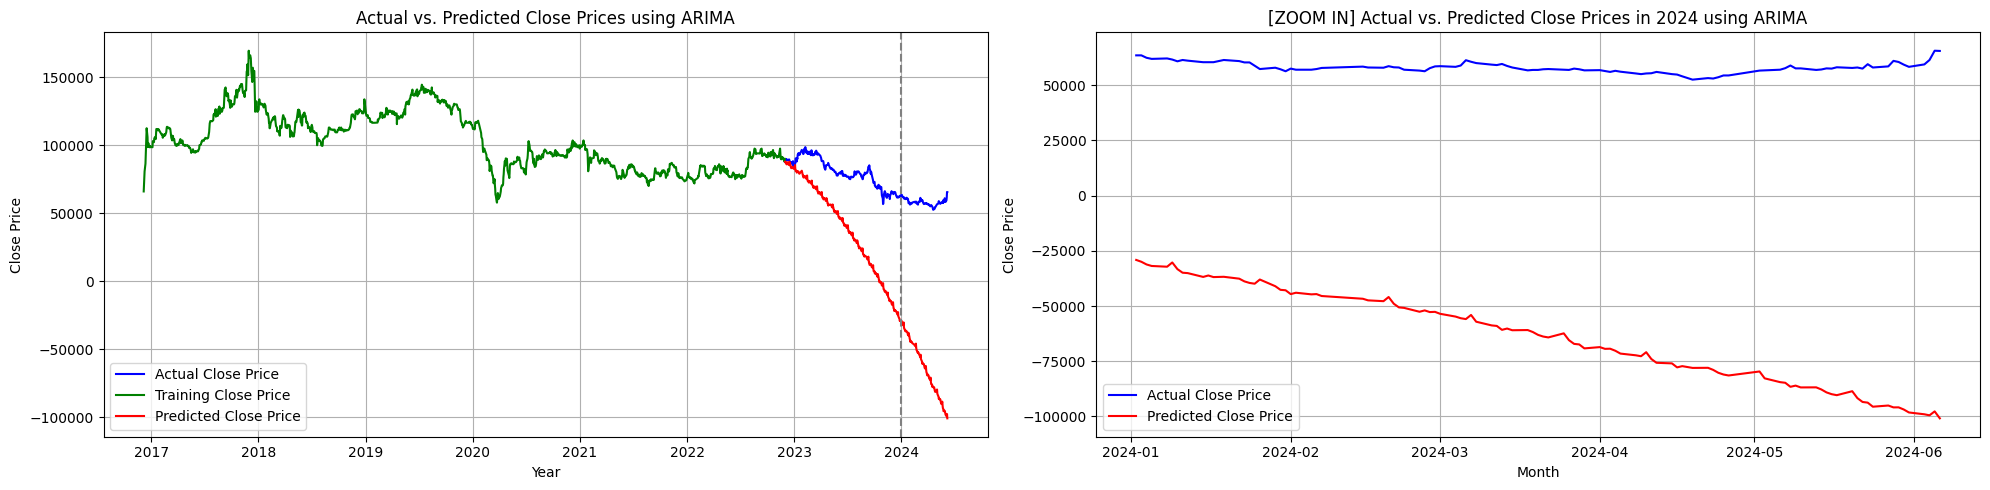

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Plot baseline and predictions for the entire dataset
axes[0].plot(test["Close"], label="Actual Close Price", color='blue')
axes[0].plot(train["Close"], label="Training Close Price", color='green')
axes[0].plot(predict['Prediction'],label="Predicted Close Price", color='red')
axes[0].axvline(pd.to_datetime('2024-01-01'), color='gray', linestyle='--')
axes[0].set_title("Actual vs. Predicted Close Prices using ARIMA")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Close Price")
axes[0].legend()
axes[0].grid(True)

# Plot baseline and predictions for 2024 data only
axes[1].plot(test[test.index >= pd.to_datetime('2024-01-01')]['Close'], label="Actual Close Price", color='blue')
axes[1].plot(predict[predict.index >= pd.to_datetime('2024-01-01')]['Prediction'],label="Predicted Close Price", color='red')
axes[1].set_title("[ZOOM IN] Actual vs. Predicted Close Prices in 2024 using ARIMA")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Close Price")
axes[1].legend()
axes[1].grid(True)

# Adjust layout for the plots
plt.tight_layout()

# Show plot
plt.show()

**COMMENT**

The ARIMA() function was imported from the arima_model sub-package of the statsmodels.tsa package. To determine the optimum values of p, d, and q, the auto_arima function was executed. The values of p, d, and q were determined to be (1, 1, 1), achieving the lowest value of AIC = 27173.794.

The ARIMA model demonstrated poor performance in predicting close prices over the long term, showing a noticeable downward trend where predictions diverged significantly from actual close prices over time. The RMSE score of 77243.4 indicates a very high level of error in predictions, reflecting substantial discrepancies between predicted and actual values. Furthermore, the R2 score of -32.84, far from its optimal value of 1, underscores the model's inability to explain variance in the data. A negative R2 score typically occurs when the model performs worse than a horizontal line fitted to the data.

# Question 3 - Stock Prediction with Deep Learning Methods

This section delves into the use of deep learning methods for stock prediction, highlighting their potential to capture complex patterns in financial data. It covers the theoretical background, the importance of hyperparameter tuning, and the application of advanced models such as Long Short-Term Memory (LSTM) and Gated Recurrent Units (GRU) to enhance prediction accuracy.

## 3.1. Theoretical background

### 3.1.1. LSTM (Long Short-Term Memory Networks)

LSTMs are a specialized type of RNN architecture designed to tackle the challenge of remembering information over extended periods, enhancing the memory capabilities of recurrent neural networks. These networks typically hold short-term memory, utilizing earlier information for immediate tasks within the current neural network.They prove effective across various sequence modeling problems such as video processing, Natural Language Processing and time-series analysis.

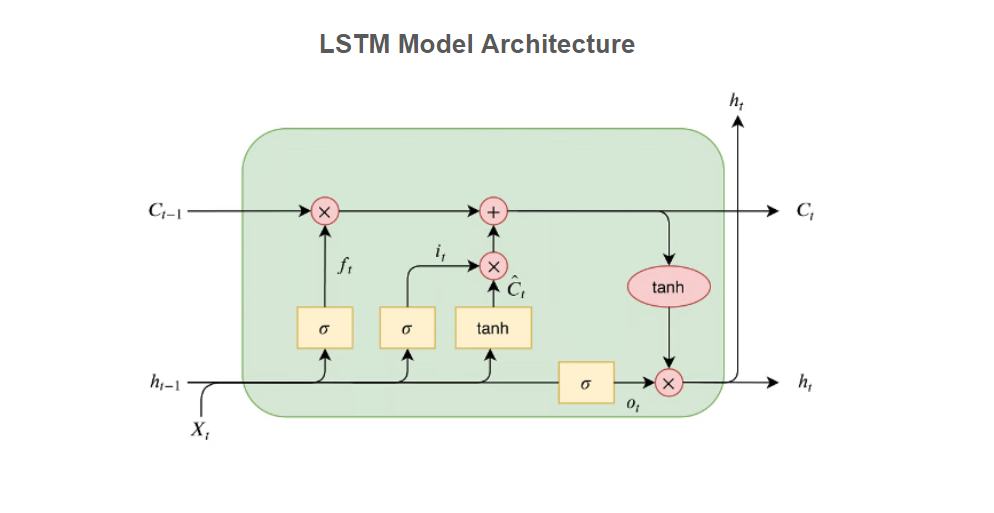

**LSTM ARCHITECTURE**

In LSTM architecture, the outcome of an LSTM at a specific moment in time is influenced by three factors:
- The cell state (Ct), which represents the current long-term memory of the network.
- The previous hidden state (ht-1), which refers to the output from the prior time step.
- The input data (Xt) present at the current time step.

LSTM neural networks utilize a series of gates to regulate information flow in a data sequence. These gates include:
- Forget gate (ft): Determines what information should be discarded from the cell state.
- Input gate (it): Controls which values from the input and the previous hidden state should be updated in the cell state.
- Output gate (Ot): Decides what part of the cell state should be output as the hidden state.

These gates serve as filters and function as separate neural networks within the LSTM network. They govern how information is brought into the network, stored, and eventually released.

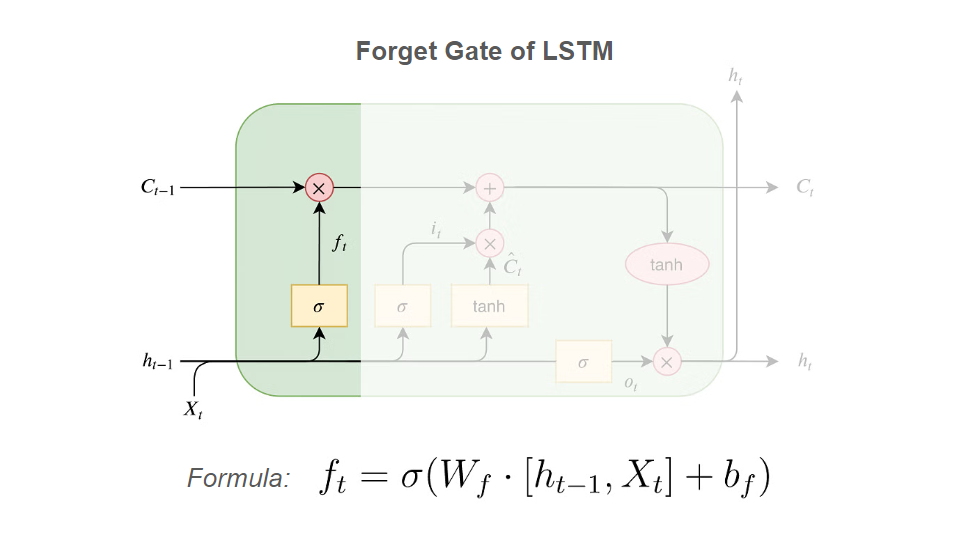

**FORGET GATE**

The first stage in architecture is the Forget Gate. Here, the LSTM neural network identifies relevant elements of the cell state based on the previous hidden state and new input data.

The previous hidden state (ht-1) and new input data (Xt) are fed into a neural network that outputs a vector with values between 0 and 1, using a sigmoid activation function. This network is trained to output values close to 0 for irrelevant information and close to 1 for relevant information. These values act as filters, allowing more information as they approach 1. These output values are then multiplied element-wise with the previous cell state (Ct-1), down-weighting irrelevant parts by a factor close to 0, reducing their influence on subsequent steps.


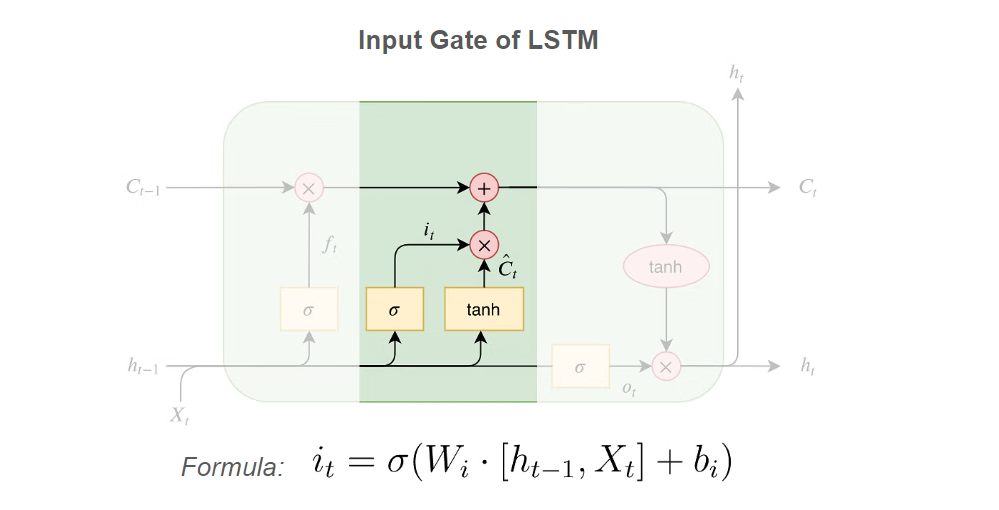

**INPUT GATE**

The next stage involves the input gate and the new memory network, determining what new information should be added to the network's long-term memory (cell state) based on the previous hidden state and current input data. Both the input gate and new memory network are neural networks that receive the same inputs: the previous hidden state and current input data, identical to those provided to the forget gate.

The input gate uses a sigmoid activation function to filter the new memory vector, outputting values between 0 and 1. Low output values indicate that the corresponding cell state elements should not be updated. The new memory network uses a tanh activation function to create a "new memory update vector" by combining the previous hidden state and current input data. This vector adjusts the long-term memory (cell state) based on the latest data, with the tanh function allowing for values in the range [-1, 1].

The input gate filter and the new memory update are combined to update the cell state. The input gate filter ensures only relevant components of the new memory update are added to the cell state through pointwise multiplication.


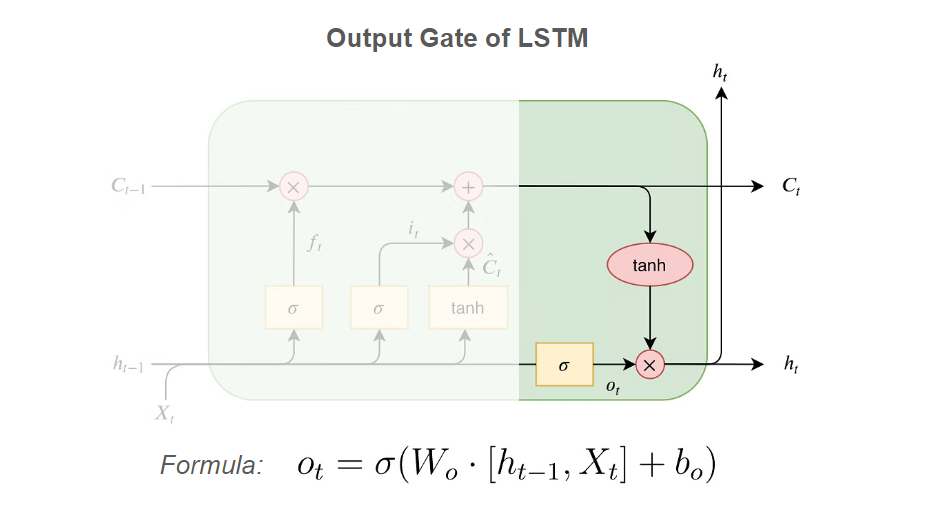

**OUTPUT GATE**

In the final stage of an LSTM, the new hidden state is determined using the updated cell state, previous hidden state, and new input data, with the output gate performing this process.

The output gate, a sigmoid-activated network, filters the updated cell state to decide which elements should be output as the new hidden state. It takes the previous hidden state and new input data as inputs, producing outputs in the range of [0,1]. The updated cell state is passed through a tanh activation to limit its values to [-1,1], then multiplied pointwise by the output gate's output to generate the final hidden state. LSTM cells use weight matrices (Wf, Wi, Wo, WC) and biases (bf, bi, bo, bC) with gradient-based optimization to learn parameters, which are connected to each gate.


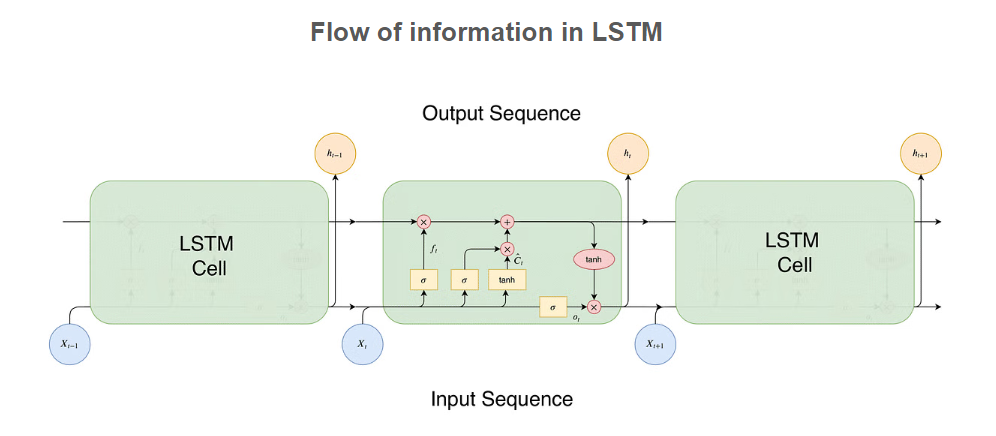

**FLOW OF INFORMATION IN LSTM**

The flow of information in LSTM occurs in a recurrent manner, forming a chain-like structure. The output gate controls the flow of the latest cell output to the final state, but the LSTM cell's output is still a hidden state, not directly related to the target prediction. To convert the hidden state into the desired output, a linear layer is applied at the end, after the repeated LSTM steps.

Unrolling LSTM models over time involves expanding the LSTM network for each time step, feeding outputs from one step into the next. This helps train LSTM networks on time series data by predicting the next value in a sequence based on previous values, capturing long-term dependencies and patterns.

Backpropagation is the algorithm used to train LSTM networks on time series data. Backpropagation unrolls the network over a fixed number of time steps, propagates error back through each step, and updates weights using gradient descent. This process is repeated for multiple epochs until the network converges to a satisfactory solution.

### 3.1.2. GRU (Gated Recurrent Unit)

GRU (Gated Recurrent Unit) is an advancement of the standard RNN i.e recurrent neural network. GRUs are very similar to LSTM. Just like LSTM, GRU uses gates to control the flow of information. They are relatively new as compared to LSTM. However, unlike LSTM, it does not have a separate cell state (Ct). It only has a hidden state(Ht). Due to the simpler architecture, GRUs are faster to train.

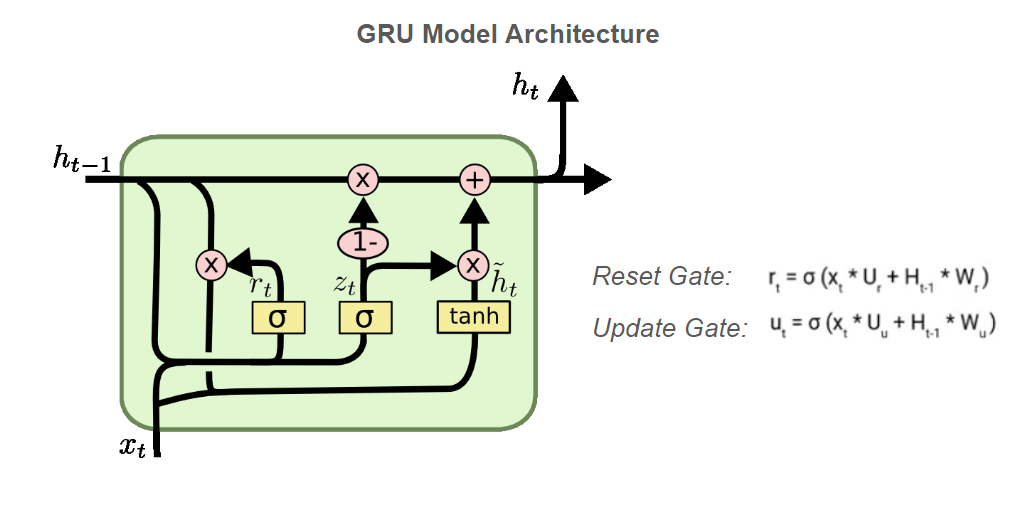

Let's understand how GRU works. Similar to an LSTM, at each timestamp t, it takes an input Xt and the hidden state Ht-1 from the previous timestamp t-1. It then outputs a new hidden state Ht, which is passed to the next timestamp. A GRU primarily has two gates, as opposed to the three gates in an LSTM cell. The first gate is the Reset gate, and the second is the Update gate.

The Reset Gate is responsible for the short-term memory of the network, represented by the hidden state Ht. Similar to the LSTM gate equation, the value of rt ranges from 0 to 1 due to the sigmoid function. Here, Ur and Wr are weight matrices for the reset gate. Similarly, there is an Update gate for long-term memory. The only difference lies in the weight matrices, Uu and Wu.

The GRU takes two inputs as vectors: the current input Xt and the previous hidden state Ht-1. To perform gate calculations, element-wise multiplication (similar to a dot product for each element) is carried out between the current input and the previous hidden state vectors. This is done separately for each gate, essentially creating “parameterized” versions of the inputs specific to each gate. Finally, an activation function (a function that transforms the values) is applied element-wise to each element in these parameterized vectors. This activation function typically outputs values between 0 and 1, which are used by the gates to control information flow.


### 3.1.3. Forecasting strategies

There are two methods of forecasting: open loop and closed loop forecasting.

**Open loop forecasting** — This method predicts the next time step in a sequence using only the input data. When making predictions for subsequent time steps, it collects the true values from the data source and uses those as input. For example, to predict the value for time step t of a sequence using data collected in time steps 1 through t minus 1, it makes the prediction for time step t using this data. To make predictions for time step t plus 1, it waits until the true value for time step t is recorded and uses that as input for the next prediction. Use open loop forecasting when true values are available to provide to the RNN before making the next prediction.

**Closed loop forecasting** — This method predicts subsequent time steps in a sequence by using the previous predictions as input. In this case, the model does not require the true values to make the predictions. For example, to predict the values for time steps t through t plus k of the sequence using data collected in time steps 1 through t minus 1, it makes the prediction for time step t using this data. To predict for time step t plus 1, it uses the predicted value for time step t as input, and so on. Use closed loop forecasting to forecast multiple subsequent time steps or when true values are not available to provide to the RNN before making the next prediction.

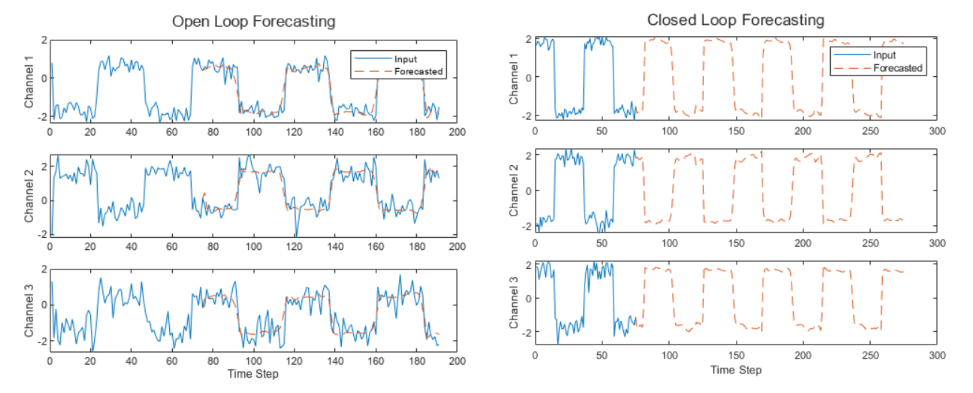

**In this project, we will use open loop forecasting** because it predicts the next time step in a sequence using only the input data and incorporates true values from the data source for subsequent predictions.

## 3.2. Preprocessing
We begin by extracting and reshaping the 'Close' column data, followed by normalizing it to ensure consistent scaling. The data is then split into training and testing sets, with 80% allocated for training and 20% for testing. To enable the LSTM model to learn temporal patterns, we create sequences of 10 timesteps from the data, where each sequence serves as input to predict the next data point. Finally, we reshape the input data into the required 3D format for LSTM processing, preparing it for model training and prediction.

In [ ]:
# Reshape and select the 'Close' column for LSTM processing
data_lstm = data['Close'].values.reshape(-1, 1)
data_lstm.shape

(1868, 1)

In [ ]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_lstm = scaler.fit_transform(data_lstm)

In [ ]:
# Split the data into training and testing sets (80-20 split)
train_size = int(len(data_lstm) * 0.8)
test_size = len(data_lstm) - train_size

train = data_lstm[0:train_size,:]
test = data_lstm[train_size:len(data_lstm),:]

print("Train size:", train_size)
print("Test size:", test_size)

Train size: 1494
Test size: 374


In [ ]:
# create a data structure with 10 timesteps for x (input) and y (output)
time_stemp = 10
x_train = []
y_train = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    x_train.append(a)
    y_train.append(train[i + time_stemp, 0])
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = []
y_test = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    x_test.append(a)
    y_test.append(test[i + time_stemp, 0])
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
# reshape input data for LSTM ([samples, time steps, features])
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

## 3.3. Hyperparameter Tuning

### 3.3.1. The number of training epochs
In deep learning, an epoch is a complete iteration through the entire training dataset in one cycle for training the machine learning model. During an epoch, every training sample in the dataset is processed by the model, and its weights and biases are updated in accordance with the computed loss or error.

Generally, increasing the number of epochs enhances the model's performance by allowing it to learn more complex patterns. However, too many epochs can lead to overfitting. Thus, it is crucial to monitor the model's performance on a validation set during training and stop when validation performance begins to decline.

We will evaluate the model's performance with different numbers of epochs, ranging from 1 to 10. Due to the setting of random seeds in Python, repeating the experiment can produce different results (same number of epochs but different outcomes), which may sometimes be misleading. **To improve authenticity, we will fit the model 10 times for each number of epochs and record the RMSE score.**

In [ ]:
# create a score df
score_epoch = pd.DataFrame(columns=['no. epochs','train RMSE','test RMSE'])
score_epoch.head()

,no. epochs,train RMSE,test RMSE


In [ ]:
# model
model = Sequential()
model.add(LSTM(50,activation='relu', input_shape=(1, time_stemp)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Function to train the model with given number of epochs
def train_and_evaluate_epoch(model, x_train, y_train, x_test, y_test, epochs):
    model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=0)
    train_predict = model.predict(x_train,verbose=0)
    test_predict = model.predict(x_test,verbose=0)

    # invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    train_actual = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    test_actual = scaler.inverse_transform([y_test])

    # calculate root mean squared error
    train_rmse = math.sqrt(mean_squared_error(train_actual[0], train_predict[:,0]))
    test_rmse = math.sqrt(mean_squared_error(test_actual[0], test_predict[:,0]))

    return train_rmse, test_rmse

In [ ]:
# Varying epochs from 1 to 10
num_epochs_list = list(range(1, 11))

for no_epochs in num_epochs_list:
    for x in range(10):  # Conduct 10 experiments
        train_rmse, test_rmse = train_and_evaluate_epoch(model, x_train, y_train, x_test, y_test, no_epochs)

       # put data info score dataframe
        row = [no_epochs,train_rmse, test_rmse]
        score_epoch.loc[len(score_epoch)]=row

    print(f"Completed training with {no_epochs} epoch(s).")

Completed training with 1 epoch(s).
Completed training with 2 epoch(s).
Completed training with 3 epoch(s).
Completed training with 4 epoch(s).
Completed training with 5 epoch(s).
Completed training with 6 epoch(s).
Completed training with 7 epoch(s).
Completed training with 8 epoch(s).
Completed training with 9 epoch(s).
Completed training with 10 epoch(s).


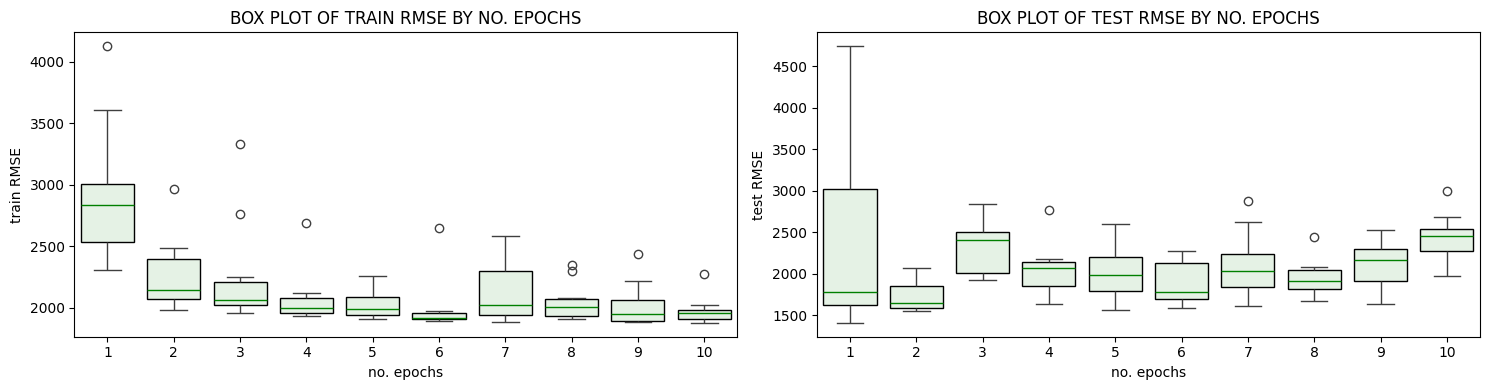

In [ ]:
# List of columns to plot
columns_to_plot = ['train RMSE', 'test RMSE']
score_epoch['no. epochs'] = score_epoch['no. epochs'].astype('int')

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate through the columns and corresponding subplot axis
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x='no. epochs', y=col, data=score_epoch, ax=axs[i],
                boxprops=dict(facecolor='#e5f2e5ff', edgecolor='black'),
                medianprops=dict(color='green'))
    axs[i].set_title(f'BOX PLOT OF {col.upper()} BY NO. EPOCHS')

# Adjust layout
plt.tight_layout()
plt.show()

**COMMENT**

The train RMSE tends to decrease as the number of epochs increases. Examining the median value of the train RMSE, there is a significant reduction from 1 to 3 epochs, but beyond that, the RMSE does not change much, fluctuating around 2000 with additional epochs. Conversely, the test RMSE tends to increase as the number of epochs increases, with a noticeable rise after 5 epochs, indicating overfitting. Therefore, in this case, we use 5 epochs to balance training accuracy and prevent overfitting.

### 3.3.2. The number of neurons
A neuron is a fundamental unit in an LSTM network responsible for processing and memorizing sequential information, with the ability to retain and selectively update information over extended periods. The number of neurons directly influences the network's learning capacity; typically, more neurons can capture more intricate patterns in the data but may lead to longer training times and an increased risk of overfitting the training data.

We will evaluate the model's performance with different numbers of neurons, ranging from 10 to 100. Similar to tuning the number of epochs, to ensure reliability, we will train the model 10 times for each configuration of neurons and record the RMSE score.

In [ ]:
score_neuron = pd.DataFrame(columns=['no. neurons','train RMSE','test RMSE'])
score_neuron.head()

,no. neurons,train RMSE,test RMSE


In [ ]:
def create_model(neurons):
    model = Sequential()
    model.add(LSTM(neurons, activation='relu', input_shape=(1, time_stemp)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [ ]:
# Function to train the model with given number of neurons
def train_and_evaluate_neuron(x_train, y_train, x_test, y_test, neurons):
    model = create_model(neurons)
    model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=0)
    train_predict = model.predict(x_train,verbose=0)
    test_predict = model.predict(x_test,verbose=0)

    # invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    train_actual = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    test_actual = scaler.inverse_transform([y_test])

    # calculate root mean squared error
    train_rmse = math.sqrt(mean_squared_error(train_actual[0], train_predict[:,0]))
    test_rmse = math.sqrt(mean_squared_error(test_actual[0], test_predict[:,0]))

    return train_rmse, test_rmse

In [ ]:
# List of neuron counts to try
neuron_counts = list(range(10,110,10))

for neurons in neuron_counts:
    for x in range(10):  # Conduct 10 experiments
        train_rmse, test_rmse = train_and_evaluate_neuron(x_train, y_train, x_test, y_test, neurons)

        # put data info score dataframe
        row = [neurons,train_rmse, test_rmse]
        score_neuron.loc[len(score_neuron)]=row

    print(f"Completed training with {neurons} neurons(s).")

Completed training with 10 neurons(s).
Completed training with 20 neurons(s).
Completed training with 30 neurons(s).
Completed training with 40 neurons(s).
Completed training with 50 neurons(s).
Completed training with 60 neurons(s).
Completed training with 70 neurons(s).
Completed training with 80 neurons(s).
Completed training with 90 neurons(s).
Completed training with 100 neurons(s).


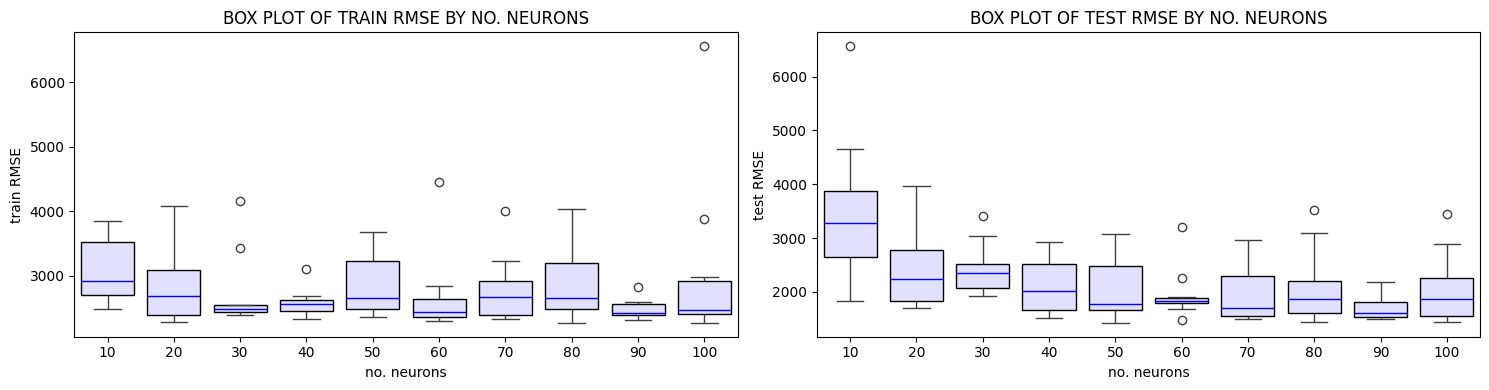

In [ ]:
# List of columns to plot
columns_to_plot = ['train RMSE', 'test RMSE']
score_neuron['no. neurons'] = score_neuron['no. neurons'].astype('int')

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate through the columns and corresponding subplot axis
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x='no. neurons', y=col, data=score_neuron, ax=axs[i],
                boxprops=dict(facecolor='#e1e1ffff', edgecolor='black'),
                medianprops=dict(color='blue'))
    axs[i].set_title(f'BOX PLOT OF {col.upper()} BY NO. NEURONS')

# Adjust layout
plt.tight_layout()
plt.show()

**COMMENT**

Regarding the train RMSE, the median value shows a slight decrease with increasing numbers of neurons. Beyond 30 neurons, the train RMSE stabilizes, fluctuating around 1500 without significant change as more neurons are added. Meanwhile, the test RMSE tends to decrease as the number of neurons increases. However, beyond 60 neurons, there is little improvement in test RMSE. Therefore, we select 50 neurons as it strikes a balance between achieving good fitting performance and not excessively increasing training time.

## 3.4. LSTM & GRU models

Due to the setting of random seeds in Python, repeating the experiment can produce different results that sometimes may be misleading. To improve the authenticity, **each model is fitted 10 times respectively** (10 experiments for each model).

In [ ]:
score = pd.DataFrame(columns=['model','experiment','train RMSE','test RMSE',
                            'train R2','test R2'])
score.head()

,model,experiment,train RMSE,test RMSE,train R2,test R2


In [ ]:
def train_model(model,model_name):
  for i in range(10):
    model.fit(x_train, y_train, epochs=5, batch_size=1,verbose=0)
    # make predictions with input data
    train_predict = model.predict(x_train,verbose=0)
    test_predict = model.predict(x_test,verbose=0)

    # invert predictions
    train_predict = scaler.inverse_transform(train_predict)
    train_actual = scaler.inverse_transform([y_train])
    test_predict = scaler.inverse_transform(test_predict)
    test_actual = scaler.inverse_transform([y_test])

    # calculate root mean squared error
    train_score_rmse = math.sqrt(mean_squared_error(train_actual[0], train_predict[:,0]))
    test_score_rmse = math.sqrt(mean_squared_error(test_actual[0], test_predict[:,0]))

    # Calculate R² score
    train_score_r2 = r2_score(train_actual[0], train_predict[:,0])
    test_score_r2 = r2_score(test_actual[0], test_predict[:,0])

    # put data info dataframe
    row = [model_name,i+1,train_score_rmse,test_score_rmse,train_score_r2,test_score_r2]
    score.loc[len(score)]=row

    print(f'Finished {str(i+1)} experiment(s).')

In [ ]:
def plot_model(data_lstm,model,model_name):
  # make predictions with input data
  train_predict = model.predict(x_train,verbose=0)
  test_predict = model.predict(x_test,verbose=0)

  # invert predictions
  train_predict = scaler.inverse_transform(train_predict)
  train_actual = scaler.inverse_transform([y_train])
  test_predict = scaler.inverse_transform(test_predict)
  test_actual = scaler.inverse_transform([y_test])

  print(f'AN ILLUSTRATIVE EXAMPLE OF {model_name} PERFORMANCE')

  # shift train predictions for plotting
  train_predict_plot = np.empty_like(data_lstm)
  train_predict_plot[:, :] = np.nan
  train_predict_plot[time_stemp:len(train_predict)+time_stemp, :] = train_predict

  # shift test predictions for plotting
  test_predict_plot = np.empty_like(data_lstm)
  test_predict_plot[:, :] = np.nan
  test_predict_plot[len(train_predict)+(time_stemp*2)+1:len(data_lstm)-1, :] = test_predict

  # Create a DataFrame
  df_plot = pd.DataFrame({
      'Date': data.index.values,
      'Actual Close Price': scaler.inverse_transform(data_lstm).flatten(),
      'Predicted Close Price (train)': train_predict_plot.flatten(),
      'Predicted Close Price (test)': test_predict_plot.flatten()
  })

  # Filter the DataFrame for 2024 data only
  df_plot['Date'] = pd.to_datetime(df_plot['Date'])
  df_2024 = df_plot[df_plot['Date'].dt.year == 2024]

  # Create subplots
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

  # Plot baseline and predictions for the entire dataset
  axes[0].plot(df_plot['Date'], df_plot['Actual Close Price'], label="Actual Close Price", color='blue')
  axes[0].plot(df_plot['Date'], df_plot['Predicted Close Price (train)'], label="Predicted Close Price (train set)", color='green')
  axes[0].plot(df_plot['Date'], df_plot['Predicted Close Price (test)'], label="Predicted Close Price (test set)", color='red')
  axes[0].axvline(pd.to_datetime('2024-01-01'), color='gray', linestyle='--')
  axes[0].set_title(f"Actual vs. Predicted Close Prices using {model_name}")
  axes[0].set_xlabel("Year")
  axes[0].set_ylabel("Close Price")
  axes[0].legend()
  axes[0].grid(True)


  # Plot baseline and predictions for 2024 data only
  axes[1].plot(df_2024['Date'], df_2024['Actual Close Price'], label="Actual Close Price", color='blue')
  axes[1].plot(df_2024['Date'], df_2024['Predicted Close Price (train)'], label="Predicted Close Price (train set)", color='green')
  axes[1].plot(df_2024['Date'], df_2024['Predicted Close Price (test)'], label="Predicted Close Price (test set)", color='red')
  axes[1].set_title(f"[ZOOM IN] Actual vs. Predicted Close Prices in 2024 using {model_name}")
  axes[1].set_xlabel("Month")
  axes[1].set_ylabel("Close Price")
  axes[1].legend()
  axes[1].grid(True)


  # Adjust layout for the plots
  plt.tight_layout()

  # Show plot
  plt.show()

### 3.4.1. Vanilla LSTM
A Vanilla LSTM is a basic LSTM model with one hidden LSTM layer and an output layer for making predictions. It also has a dense layer, where each neuron from the LSTM layer connects to each neuron in the dense layer.

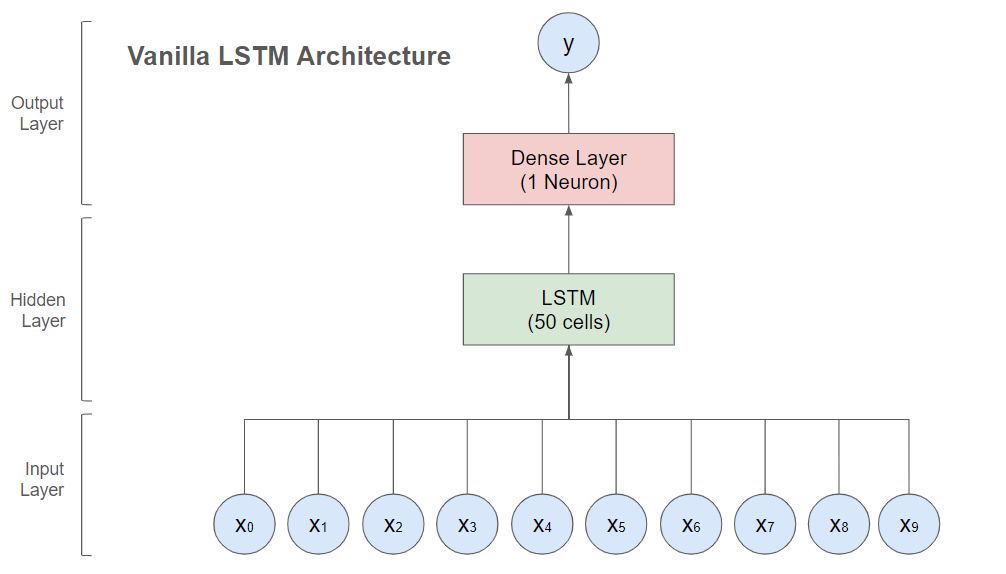

In [ ]:
# Vanilla LSTM model
vanilla_lstm = Sequential()
vanilla_lstm.add(LSTM(50,activation='relu', input_shape=(1, time_stemp)))
vanilla_lstm.add(Dense(1))
vanilla_lstm.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
train_model(vanilla_lstm,'VANILLA LSTM')

Finished 1 experiment(s).
Finished 2 experiment(s).
Finished 3 experiment(s).
Finished 4 experiment(s).
Finished 5 experiment(s).
Finished 6 experiment(s).
Finished 7 experiment(s).
Finished 8 experiment(s).
Finished 9 experiment(s).
Finished 10 experiment(s).


AN ILLUSTRATIVE EXAMPLE OF VANILLA LSTM PERFORMANCE


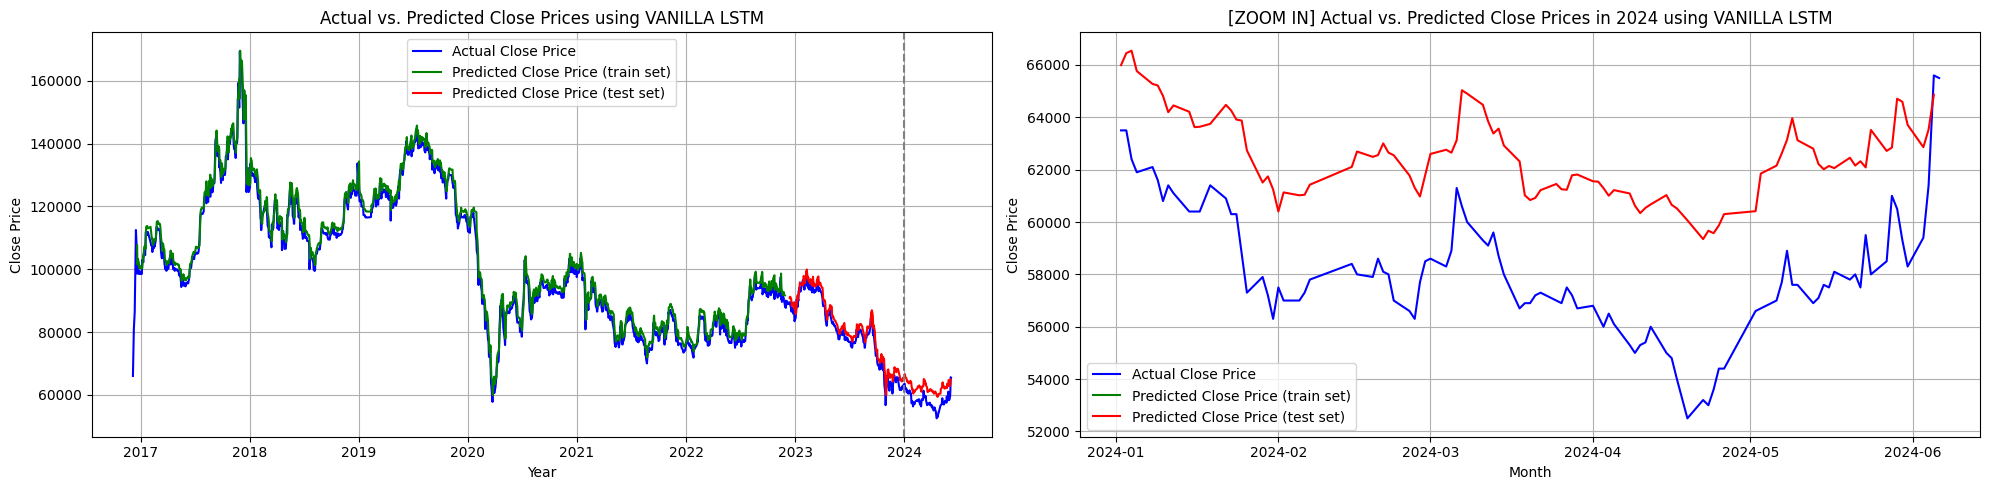

In [ ]:
plot_model(data_lstm,vanilla_lstm,'VANILLA LSTM')

**COMMENT**

The Vanilla LSTM model demonstrates strong performance on the training set, where the predicted prices closely match the actual prices. On the test set, the model's predictions, represented by the red line, generally track closely with the actual prices indicated by the blue line. There is a gap of approximately 4000 VND between the predicted and actual prices, and this gap tends to widen over time.


### 3.4.2. Stacked LSTM
In a Stacked LSTM, the output sequences from one LSTM layer are passed as input to the next LSTM layer. A Vanilla LSTM can be extended into a Stacked LSTM by adding multiple LSTM layers. This increases the model's complexity, allowing for more fully connected layers or a higher dimensionality of the LSTM output space.

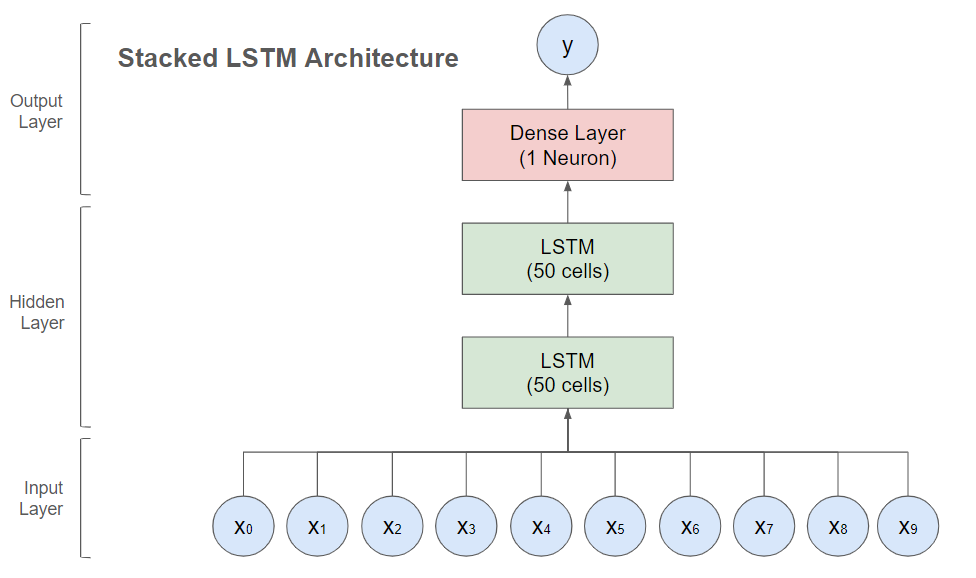

In [ ]:
# stacked LSTM model
stacked_lstm = Sequential()
stacked_lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(1,time_stemp)))
stacked_lstm.add(LSTM(50, activation='relu'))
stacked_lstm.add(Dense(1))
stacked_lstm.compile(optimizer='adam', loss='mse')

In [ ]:
train_model(stacked_lstm,'STACKED LSTM')

Finished 1 experiment(s).
Finished 2 experiment(s).
Finished 3 experiment(s).
Finished 4 experiment(s).
Finished 5 experiment(s).
Finished 6 experiment(s).
Finished 7 experiment(s).
Finished 8 experiment(s).
Finished 9 experiment(s).
Finished 10 experiment(s).


AN ILLUSTRATIVE EXAMPLE OF STACKED LSTM PERFORMANCE


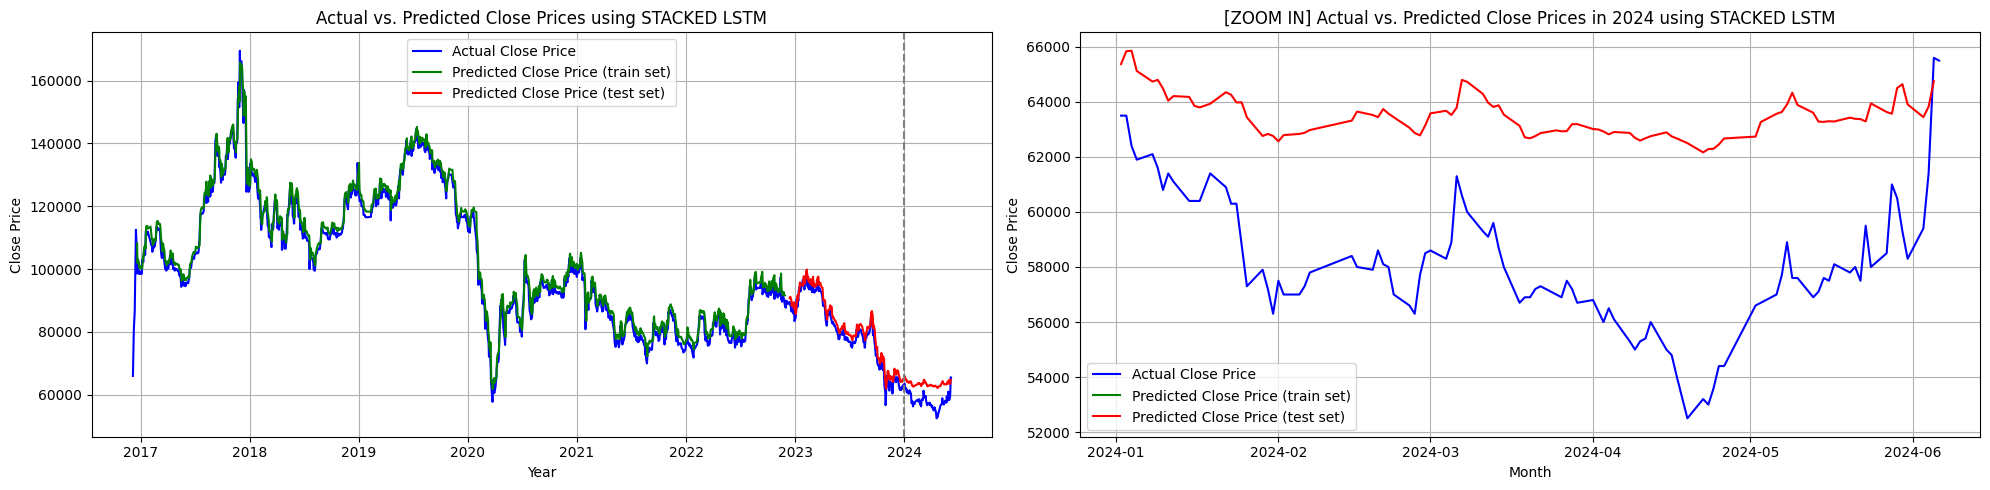

In [ ]:
plot_model(data_lstm,stacked_lstm,'STACKED LSTM')

**COMMENT**

The performance of the Stacked LSTM model on the test set reveals significant gap between predicted prices and actual prices. Moreover, this gap widens over time, reaching up to approximately 10000 VND.

### 3.4.3. Bidirectional LSTM
Bidirectional LSTMs, an extension of traditional LSTMs, improve the accuracy of models in classifying sequences. When all steps of the input sequence are available, Bidirectional LSTMs train two LSTMs instead of one. The first processes the sequence as it is, while the second processes a backward version of the sequence.

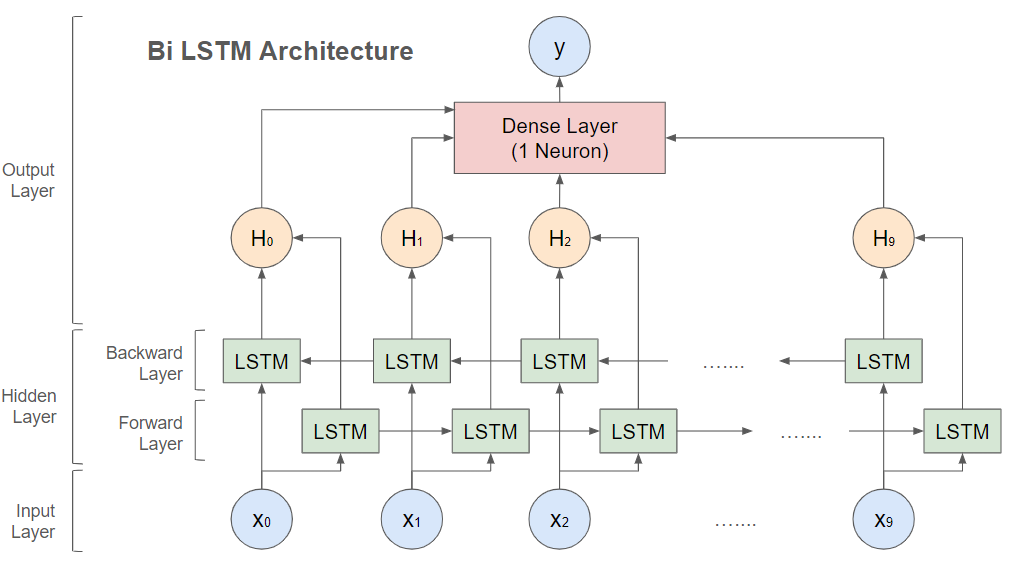

In [ ]:
# Bidirectional LSTM model
bi_lstm = Sequential()
bi_lstm.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(1,time_stemp)))
bi_lstm.add(Dense(1))
bi_lstm.compile(optimizer='adam', loss='mse')

In [ ]:
train_model(bi_lstm,'BI LSTM')

Finished 1 experiment(s).
Finished 2 experiment(s).
Finished 3 experiment(s).
Finished 4 experiment(s).
Finished 5 experiment(s).
Finished 6 experiment(s).
Finished 7 experiment(s).
Finished 8 experiment(s).
Finished 9 experiment(s).
Finished 10 experiment(s).


AN ILLUSTRATIVE EXAMPLE OF BI LSTM PERFORMANCE


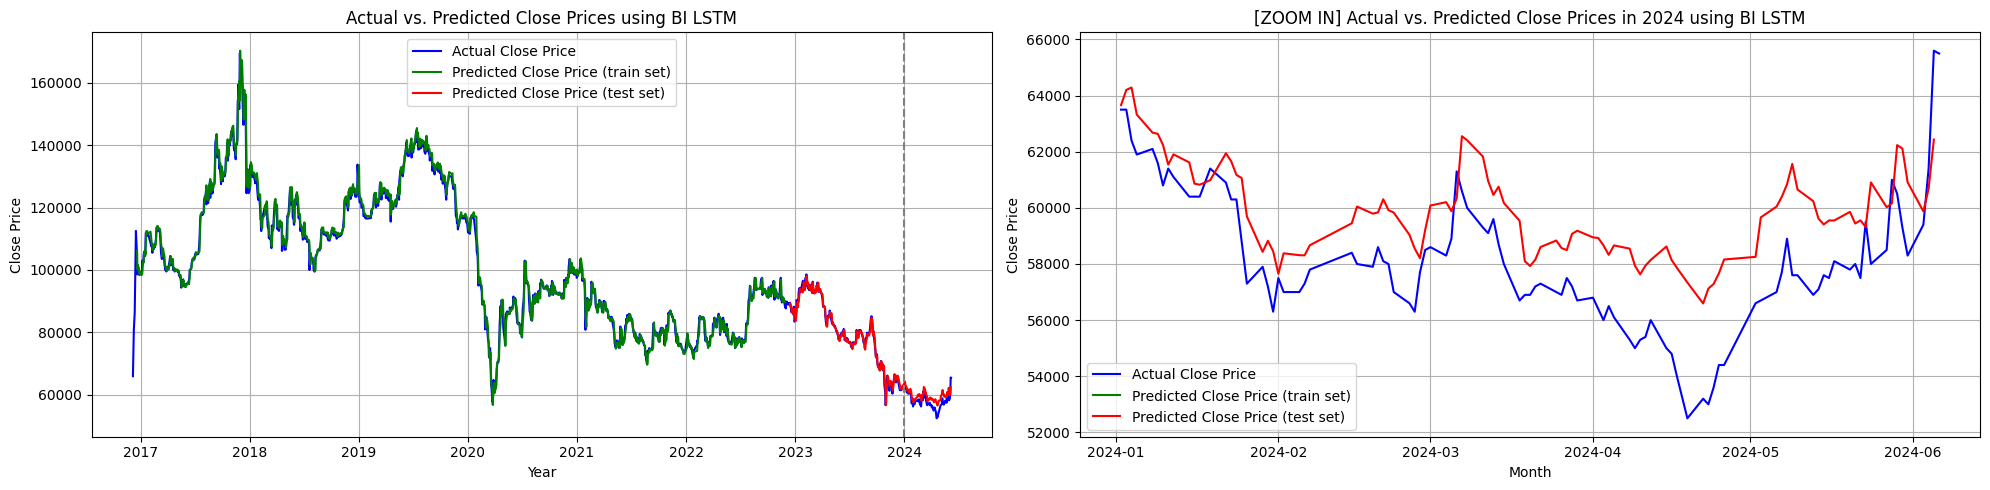

In [ ]:
plot_model(data_lstm,bi_lstm,'BI LSTM')

**COMMENT**

The Bidirectional LSTM model demonstrates robust performance on the training set, achieving a close fit between predicted and actual prices. On the test set, the model's predictions closely align with the actual prices, represented by the blue line, with a small gap of approximately 2000 VND between them.

### 3.4.4. GRU
A GRU model is similar to a Vanilla LSTM model but has a simpler architecture, making it faster to train. GRUs achieve comparable performance to LSTMs with fewer parameters, which leads to shorter training times and less computational cost, while still effectively capturing temporal dependencies in the data.

In [ ]:
# GRU model
gru = Sequential()
gru.add(LSTM(50,activation='relu', input_shape=(1, time_stemp)))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
train_model(gru,'GRU')

Finished 1 experiment(s).
Finished 2 experiment(s).
Finished 3 experiment(s).
Finished 4 experiment(s).
Finished 5 experiment(s).
Finished 6 experiment(s).
Finished 7 experiment(s).
Finished 8 experiment(s).
Finished 9 experiment(s).
Finished 10 experiment(s).


AN ILLUSTRATIVE EXAMPLE OF GRU PERFORMANCE


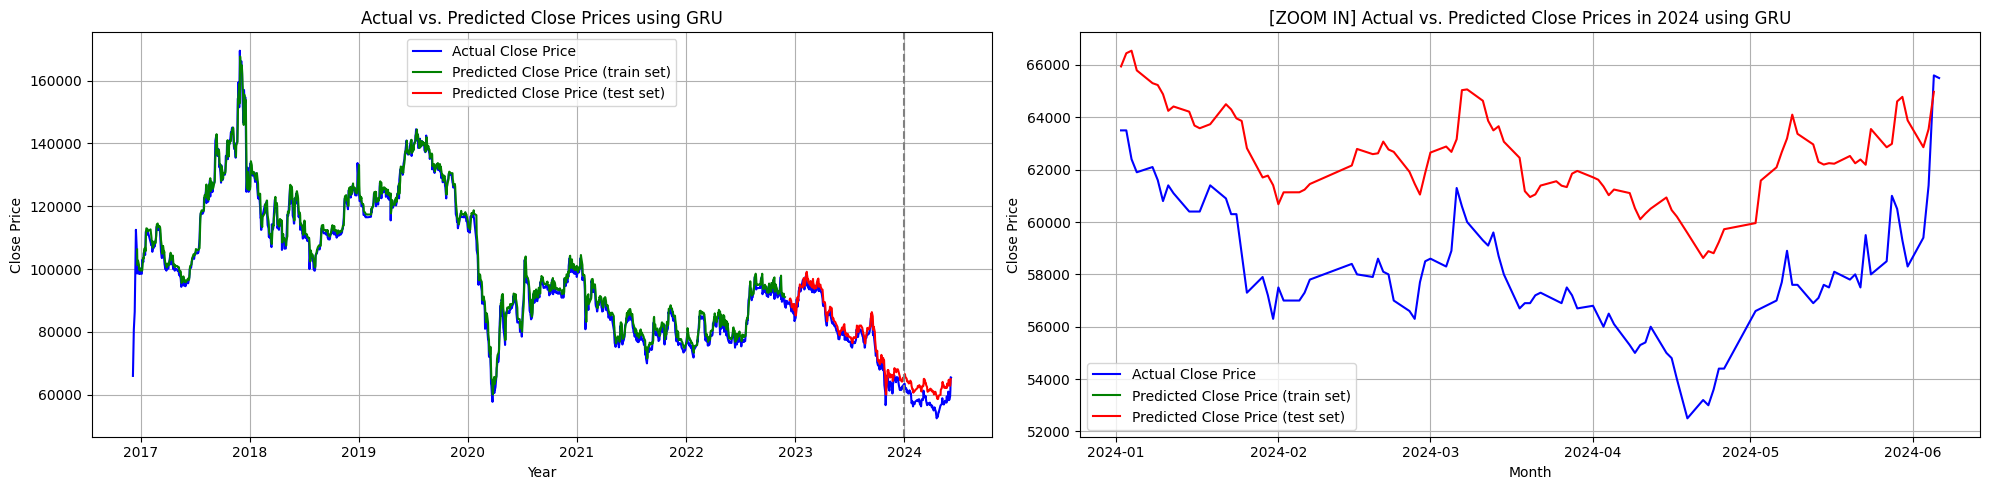

In [ ]:
plot_model(data_lstm,gru,'GRU')

**COMMENT**

The performance of the GRU model on the training set shows a strong fit, with predicted prices closely matching the actual prices. On the test set, the model's predictions are also close to the actual prices. However, it is evident that the gap between predicted and actual prices tends to increase over time, reaching up to 2000 VND, as shown in the 2024 chart.

### 3.4.5. Bidirectional GRU
A Bidirectional GRU operates similarly to a Bidirectional LSTM but benefits from the simpler and faster architecture of GRUs. By training two GRUs on the input sequence (one in the forward direction and one in the backward direction), Bidirectional GRUs provide a comprehensive understanding of the sequence, combining the speed and efficiency of GRUs with the enhanced learning capabilities of bidirectional processing.

In [ ]:
bi_gru = Sequential()
bi_gru.add(Bidirectional(GRU(50, activation='relu'), input_shape=(1,time_stemp)))
bi_gru.add(Dense(1))
bi_gru.compile(optimizer='adam', loss='mse')

In [ ]:
train_model(bi_gru,'BI GRU')

Finished 1 experiment(s).
Finished 2 experiment(s).
Finished 3 experiment(s).
Finished 4 experiment(s).
Finished 5 experiment(s).
Finished 6 experiment(s).
Finished 7 experiment(s).
Finished 8 experiment(s).
Finished 9 experiment(s).
Finished 10 experiment(s).


AN ILLUSTRATIVE EXAMPLE OF BI GRU PERFORMANCE


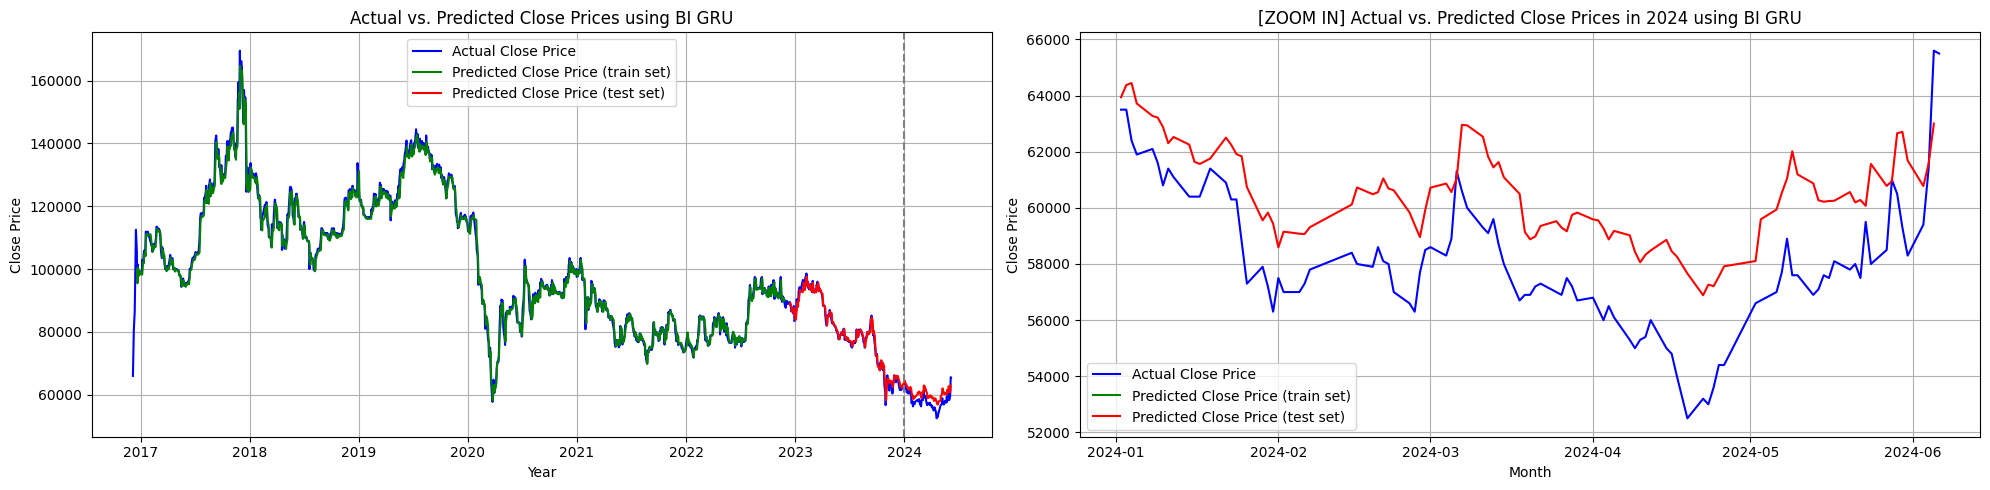

In [ ]:
plot_model(data_lstm,bi_gru,'BI GRU')

**COMMENT**

The performance of the Bidirectional GRU model on the test set is very good, with predicted prices being very close to the actual prices. In this illustrative example, The difference between the predicted and actual prices is small, around 2000 VND.

# Question 4 - Compare the two methods

## 4.0. Assessment method
To assess model performance, we use Root Mean Square Error (RMSE) and the R-squared (R2) score.

RMSE is frequently used to evaluate how accurately a model predicts outcomes. It is particularly sensitive to both very large and very small errors in a set of measurements, making it a robust indicator of measurement precision. In the formula for RMSE, n represents the total number of observations, yi stands for the actual value, and y^i denotes the predicted value.

The R2 score, on the other hand, assesses the goodness of fit of a model's predictions to the actual data. It provides a measure of how well the model captures the variability in the data. In the R2 formula, n represents the total number of observations, yi denotes the actual value of the dependent variable for observation i, y^i represents the predicted value for observation i, and y bar represents the mean of the actual values yi.

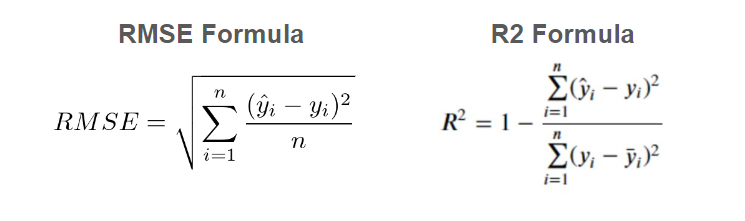

## 4.1. Comparison of LSTM and GRU models

In [ ]:
# get a view of score df
score.head()

,model,experiment,train RMSE,test RMSE,train R2,test R2
0,VANILLA LSTM,1,2549.971030,2052.286745,0.985040,0.975973
1,VANILLA LSTM,2,2384.068588,1572.449985,0.986923,0.985895
2,VANILLA LSTM,3,2711.685893,1701.035050,0.983082,0.983494
3,VANILLA LSTM,4,2116.439387,1860.262251,0.989694,0.980259
4,VANILLA LSTM,5,1992.378601,1485.472919,0.990867,0.987412


In [ ]:
np.round(score[['model','train RMSE','test RMSE']].groupby('model').describe().transpose(),1)

model             BI GRU  BI LSTM     GRU  STACKED LSTM  VANILLA LSTM
train RMSE count    10.0     10.0    10.0          10.0          10.0
           mean   2281.0   2792.5  2247.8        2533.4        2247.6
           std     229.6   1135.7   185.4         635.7         296.9
           min    2014.5   1959.3  2035.1        2023.9        1954.7
           25%    2113.0   2047.9  2128.1        2107.0        2019.4
           50%    2199.1   2224.3  2178.1        2259.9        2088.5
           75%    2402.7   3117.4  2379.9        2619.2        2508.5
           max    2696.0   5468.2  2536.0        3966.0        2711.7
test RMSE  count    10.0     10.0    10.0          10.0          10.0
           mean   1888.9   1728.3  2093.0        2979.5        2071.1
           std     425.2    288.0   565.8         422.9         535.7
           min    1390.3   1398.4  1330.1        2428.8        1485.5
           25%    1513.6   1535.0  1820.6        2627.1        1714.4
           50%    1869.4   1664.5  1871.1        2999.1        1956.3
           75%    2096.1   1892.6  2587.9        3250.7        2264.6
           max    2579.5   2281.8  3032.9        3647.1        3206.5

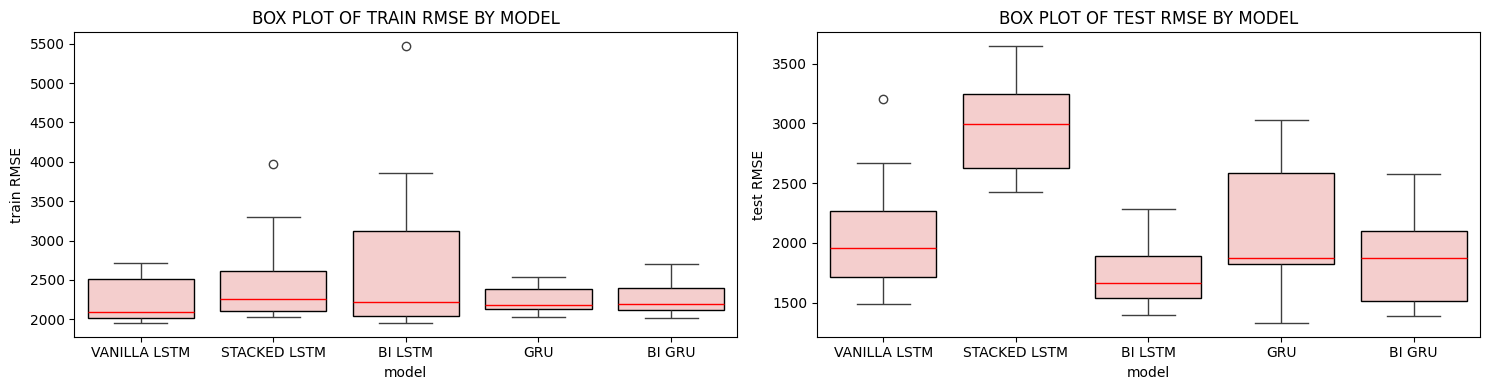

In [ ]:
# List of columns to plot
columns_to_plot = ['train RMSE', 'test RMSE']

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Iterate through the columns and corresponding subplot axis
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x='model', y=col, data=score, ax=axs[i],
                boxprops=dict(facecolor='#f4cecdff', edgecolor='black'),
                medianprops=dict(color='red'))
    axs[i].set_title(f'BOX PLOT OF {col.upper()} BY MODEL')

# Adjust layout
plt.tight_layout()
plt.show()

**COMMENT**

Looking at the training RMSE, the median values for all five models fluctuate around 2200, indicating relatively consistent performance during training. However, on the test set, the bidirectional LSTM stands out with the lowest median RMSE of 1664.5. Meanwhile, the Stacked LSTM exhibits the highest test RMSE among the models, indicating potential overfitting to the training data. The other models—GRU, BI GRU, and Vanilla LSTM—show similar median values of test RMSE around 1900.

The bidirectional LSTM is the top-performing model due to its lowest test RMSE, followed closely by GRU, BI GRU, and Vanilla LSTM. Meanwhile, the Stacked LSTM shows the least favorable performance, likely due to overfitting defined by low training RMSE but high test RMSE.

## 4.2. Comparison of econometric and deep learning models

In [ ]:
print('Exponential Smoothing RMSE: %.1f' % (test_exp_rmse))
print('Exponential Smoothing R2: %.2f' % (test_exp_r2))
print('ARIMA RMSE: %.1f' % (test_arima_rmse))
print('ARIMA R2: %.2f' % (test_arima_r2))
print('BI LSTM RMSE: %.1f' % (score[score['model']=='BI LSTM']['test RMSE'].median()))
print('BI LSTM R2: %.2f' % (score[score['model']=='BI LSTM']['test R2'].median()))

Exponential Smoothing RMSE: 5956.1
Exponential Smoothing R2: 0.80
ARIMA RMSE: 77243.4
ARIMA R2: -32.84
BI LSTM RMSE: 1664.5
BI LSTM R2: 0.98


**COMMENT**

The BI LSTM (Bidirectional LSTM) model demonstrates superior performance compared to both Exponential Smoothing and ARIMA models. BI LSTM achieves the lowest RMSE among the three models, at 1664.5, indicating its predictions are closest to the actual values. In contrast, ARIMA performs the worst with an RMSE of 77243.4, signifying significantly larger prediction errors. In terms of R2, BI LSTM achieves an impressive 0.98, suggesting that 98% of the variance in the data is explained by the model. Exponential Smoothing, while reasonable with an R² of 0.80, falls short compared to BI LSTM.

LSTMs often outperform traditional econometric models for predicting stock prices due to their ability to capture complex, nonlinear relationships in data over time. Unlike econometric models that rely on simplistic assumptions and stationary data, LSTMs excel at learning from sequential data with varying trends and seasonality.

In conclusion, the BI LSTM model outperforms both Exponential Smoothing and ARIMA models significantly in terms of both RMSE and R². This highlights the superiority of deep learning models over traditional econometric models like Exponential Smoothing and ARIMA. However, to predict stock prices, we should consider other external factors. The fluctuation of stock prices is also influenced by numerous factors, such as market conditions, political dynamics, macroeconomic indicators, industrial trends, and other external impacts on enterprises, along with management competence and organizational structure within the company.



# CONCLUSION
In summary, this report has delved into the descriptive analysis and prediction of Sabeco's stock prices using both traditional econometric methods and advanced deep learning techniques. A closer look into Sabeco’s stock prices from 2017 to 2023 revealed deep insights into the behavior of the stock. Initially, the stock peaked in 2018 then began moving downwards starting in 2020 ultimately due to Covid-19 pandemic effects among other macroeconomic factors. However, during these times Sabeco maintained strong market presence as can be demonstrated by its relatively stable trading range. Furthermore, analysis on volumes showed an immense rise in investor interest beginning from 2020 with post-2019 volumes consistently remaining high. In order to forecast Sabeco’s stock prices, this report utilized econometric methods (Exponential Smoothing and ARIMA) and deep learning methods (LSTM and GRU). While the Exponential Smoothing model captures the trend and seasonality components, it is only moderately predictive. The ARIMA model was very poor since large variations in predicted values compared to actual values. Meanwhile, deep learning approaches including LSTM and GRU models were able to capture sophisticated patterns within stock price data sets. The bidirectional LSTM emerges as the most effective model, achieving the lowest test RMSE. Following closely behind are the GRU, BI GRU, and Vanilla LSTM models. Conversely, the Stacked LSTM exhibits less favorable performance, possibly attributed to overfitting.

The study points out that it is important to select appropriate modeling techniques for stock price prediction. In this report, the bidirectional LSTM model demonstrates superior performance compared to both Exponential Smoothing and ARIMA models. By accurately forecasting Sabeco's future stock prices, this model will provide valuable insights for investors seeking optimal choices and for Sabeco in formulating effective business strategies.


# REFERENCES
1. Comparison of GRU and LSTM in Keras with an example -. ProjectPro. (n.d.). https://www.projectpro.io/recipes/what-is-difference-between-gru-and-lstm-explain-with-example
2. ProjectPro. (n.d.). LSTM model. Retrieved June 22, 2024, from https://www.projectpro.io/article/lstm-model/832
3. Analytics Vidhya. (2021, March 11). Introduction to gated recurrent unit (GRU). Retrieved from https://www.analyticsvidhya.com/blog/2021/03/introduction-to-gated-recurrent-unit-gru/
4. Analytics Vidhya. (2021, August 19). Holt-Winters method for time series analysis. Retrieved from https://www.analyticsvidhya.com/blog/2021/08/holt-winters-method-for-time-series-analysis/
5. Analytics Vidhya. (2021, May 14). Stock price prediction and forecasting using stacked LSTM. Retrieved from https://www.analyticsvidhya.com/blog/2021/05/stock-price-prediction-and-forecasting-using-stacked-lstm/
6. Brownlee, J. (2017, July 21). How to develop LSTM models for time series forecasting. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/
7. Brownlee, J. (2018, January 15). Tune LSTM hyperparameters with keras for time series forecasting. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/tune-lstm-hyperparameters-keras-time-series-forecasting/
8. MathWorks. (n.d.). Time series forecasting using deep learning. Retrieved June 22, 2024, from https://de.mathworks.com/help/deeplearning/ug/time-series-forecasting-using-deep-learning.html
9. Shukla, K. (n.d.). Types of LSTM. Kaggle. Retrieved June 22, 2024, from https://www.kaggle.com/code/kankanashukla/types-of-lstm
10. Tạp chí Kinh tế Chứng khoán Việt Nam. (2024, February). Thấy gì qua việc giá cổ phiếu Sabeco về vùng đáy lịch sử? Vietstock. Retrieved from https://vietstock.vn/2024/02/thay-gi-qua-viec-gia-co-phieu-sabeco-ve-vung-day-lich-su-737-1158612.htm
11. VietnamBiz. (2019, August 31). Thế khó của đại gia ngoại cuối cùng trên thị trường bia Việt Nam. Retrieved from https://vietnambiz.vn/the-kho-cua-dai-gia-noi-cuoi-cung-tren-thi-truong-bia-viet-nam-20190831111934408.htm
12. TOPI. (n.d.). Cổ phiếu SAB. Retrieved June 22, 2024, from https://topi.vn/co-phieu-sab.html
13. Zhang, Y., & Jiang, L. (2022). Stock price prediction based on LSTM. Atlantis Press. Retrieved from https://www.atlantis-press.com/proceedings/icedbc-22/125983558